In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import matplotlib

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/Users/aleksejgavrikov/Downloads/Anton.csv')
#Импортируем датасет через абсолютный путь :(
df['date'] = pd.to_datetime(df['date'])
df.head()

/var/folders/nv/y1xwhy_x1gx4gn0wks7mdjqc0000gn/T/ipykernel_42486/3403163305.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


,unnamed:_0,date,coord_l,coord_w,road_name,road_category,n_vehicles,n_participants,n_deaths,n_injured,vehicle_failure,non_private_vehicle,white_vehicle,black_vehicle,colored_vehicle,drunk_driver,female_driver,escaped,no_seatbelt_injury,n_drunk,n_children,n_cyclists,vehicle_age_min,vehicle_age_max,vehicle_age_avg,n_class_a,n_class_b,n_class_c,n_class_d,n_class_e,n_class_s,n_front_drive,n_rear_drive,n_4wd,n_guilty,guilty_share,n_fatal_violations,guilty_exp_avg,exp_avg,road_rank_cat,road_defects_cat,traffic_changes_bin,traffic_changes_cat,road_surface_cat,type_cat,out_of_town,street_rank_cat,weather_interpretable,weather_cat,adj_objects_interpretable,adj_objects_cat,cause_factors_cat,crossing_violation,impaired_driving,interference_violation,license_violation,maneuver_violation,other_violation,pedestrian_violation,sudden_appearance_violation,traffic_control_violation,transport_violation,vehicle_tech_violation,wrong_way,no_lighting,lighting_cat,site_objects_cat,severity,year,month,weekday,season,is_weekend,hour,is_night,is_peak_hour,weather,violations,injury_severity,np,road_km,road_m,time,region
0,6,2015-01-31,81.151944,53.740000,Романово - Завьялово - Баево - Камень-на-Оби,5.0,1,3,0,3,0,0,0,0,1,0,0,1,1,0,0,0,2003.0,2003.0,2003.0,0,1,0,0,0,0,0,0,0,1,1.0,4,17.0,17.0,Региональная или межмуниципальная (дорога реги...,Не установлены,0,Режим движения не изменялся,Сухое,Опрокидывание,1,Вне НП,nothing,5,no_obj,4,Сведения отсутствуют,0,0,0,0,0,1,0,0,0,1,0,0,0,Сумерки,12,2,2015,1,5,1,1,9,0,1,Ясно,{'Нарушение правил применения ремней безопасно...,"{'Раненый, находящийся (находившийся) на стаци...",NaN,153.0,0.0,09:10,Алтайский край
1,8,2015-01-30,85.018056,51.684444,Куяган - Куяча - Тоурак,6.0,2,3,0,2,0,1,1,0,1,0,0,0,0,0,0,0,2002.0,2004.0,2003.0,1,0,0,0,0,0,0,0,0,1,0.5,1,7.0,10.0,Региональная или межмуниципальная (дорога реги...,Не установлены,0,Режим движения не изменялся,Со снежным накатом,Столкновение,1,Вне НП,nothing,5,no_obj,4,Сведения отсутствуют,0,0,0,0,0,0,0,0,0,0,0,1,0,Светлое время суток,12,2,2015,1,4,1,0,14,0,0,Ясно,{'Нарушение правил расположения ТС на проезжей...,"{'Раненый, находящийся (находившийся) на стаци...",NaN,7.0,800.0,14:30,Алтайский край
2,12,2015-01-30,81.250000,53.818056,Барнаул - Камень-на-Оби - граница Новосибирско...,5.0,2,3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,2005.0,2008.0,2006.5,0,1,0,0,0,0,0,0,0,1,0.5,1,2.0,15.5,Региональная или межмуниципальная (дорога реги...,Не установлены,0,Режим движения не изменялся,Сухое,Столкновение,1,Вне НП,nothing,5,no_obj,4,Сведения отсутствуют,0,0,0,0,0,0,0,0,0,0,0,1,0,Светлое время суток,12,1,2015,1,4,1,0,17,0,1,Ясно,{'Нарушение правил расположения ТС на проезжей...,"{'Раненый, находящийся (находившийся) на амбу...",NaN,204.0,750.0,17:00,Алтайский край
3,39,2015-01-24,51.000000,84.000000,Быканов Мост - Солоновка - Солонешное - границ...,7.0,1,2,0,1,0,0,0,0,1,1,0,0,0,1,0,0,2000.0,2000.0,2000.0,0,1,0,0,0,0,0,0,0,1,1.0,2,26.0,26.0,Региональная или межмуниципальная (дорога реги...,Не установлены,0,Режим движения не изменялся,Заснеженное,Опрокидывание,1,Вне НП,nothing,5,no_obj,4,Сведения отсутствуют,0,1,0,0,0,0,0,0,1,0,0,0,1,"В темное время суток, освещение отсутствует",12,1,2015,1,5,1,1,19,0,0,Ясно,{'Несоответствие скорости конкретным условиям ...,"{'Раненый, находящийся (находившийся) на амбу...",NaN,121.0,0.0,19:25,Точка вне регионов
4,42,2015-01-23,84.000000,53.000000,Быканов Мост - Солоновка - Солонешное - границ...,7.0,1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,2003.0,2003.0,2003.0,0,1,0,0,0,0,0,0,0,1,1.0,1,18.0,18.0,Региональная или межмуниципальная (дорога реги...,Не установлены,0,Режим движения не изменялся,Заснеженное,Опрокидывание,1,Вне НП,LOW_VISIBILITY,3,no_obj,4,Сведения отсутствуют,0,0,0,0,0,0,0,0,0,0,0,1,1,"В темное время суток, освещение отсутствует",12,3,2015,1,4,1,0,21,0,0,Пасмурно,{'Нарушение правил расположения ТС на проезжей...,"{'Раненый, находящийся (находившийся) на амбу...",NaN,59.0,0.0,21:20,Алтайский край


In [4]:
df.isna().sum()

unnamed:_0                          0
date                                0
coord_l                             0
coord_w                             0
road_name                           0
road_category                       0
n_vehicles                          0
n_participants                      0
n_deaths                            0
n_injured                           0
vehicle_failure                     0
non_private_vehicle                 0
white_vehicle                       0
black_vehicle                       0
colored_vehicle                     0
drunk_driver                        0
female_driver                       0
escaped                             0
no_seatbelt_injury                  0
n_drunk                             0
n_children                          0
n_cyclists                          0
vehicle_age_min                     0
vehicle_age_max                     0
vehicle_age_avg                     0
n_class_a                           0
n_class_b   

In [5]:
print(df['region'].nunique())
#Один из регионов -- это точка вне регионов
print(df['date'].min())
print(df['date'].max())

86
2015-01-01 00:00:00
2024-12-31 00:00:00


In [ ]:
consequencies = ['n_VEHICLES', 'n_PARTICIPANTS', 'n_DEATHS', 'n_INJURED', 'no_seatbelt_injury', 'severity']
reasons = ['vehicle_failure', 'crossing_violation', 'impaired_driving', 'interference_violation', 'license_violation', 'maneuver_violation', 'other_violation', 'pedestrian_violation', 'sudden_appearance_violation', 'traffic_control_violation', 'transport_violation', 'vehicle_tech_violation', 'wrong_way']
tech_reasons = ['vehicle_failure', 'license_violation', 'transport_violation', 'vehicle_tech_violation']
beh_reasons = ['pedestrian_violation', 'impaired_driving', 'traffic_control_violation', 'sudden_appearance_violation', 'wrong_way']
car_description = ['non_private_vehicle', 'white_vehicle', 'black_vehicle', 'colored_vehicle', 'vehicle_age_avg', 'n_class_a', 'n_class_b', 'n_class_c', 'n_class_d', 'n_class_e', 'n_class_s', 'n_front_drive', 'n_rear_drive', 'n_4wd']
road_description = ['road_name', 'road_category', 'road_rank_cat', 'road_defects_cat', 'traffic_changes_bin', 'traffic_changes_cat', 'road_surface_cat', 'out_of_town', 'street_rank_cat', 'adj_objects_interpretable', 'adj_objects_cat']
description = ['DATE', 'female_driver', 'escaped', 'n_drunk', 'n_children', 'n_cyclists', 'n_guilty', 'guilty_share', 'n_fatal_violations', 'guilty_exp_avg', 'exp_avg', 'TYPE_cat', 'weather_interpretable', 'weather_cat', 'cause_factors_cat', 'no_lighting', 'lighting_cat', 'site_objects_cat']

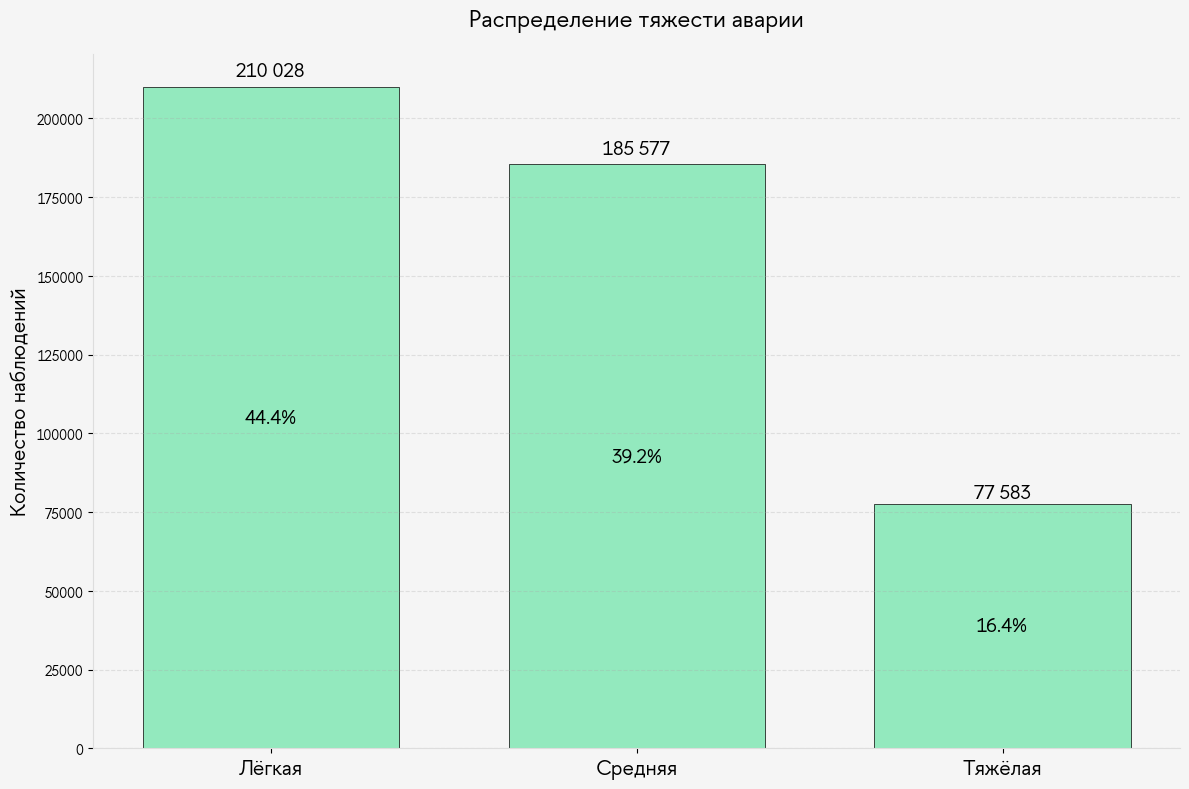

In [31]:
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()
if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name

value_counts = df['severity'].value_counts()
total = value_counts.sum()
percentages = (value_counts.values / total * 100).round(1)

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

colors = ['#93E9BE', '#93E9BE', '#93E9BE']

bars = ax.bar(
    ['Лёгкая', 'Средняя', 'Тяжёлая'],
    value_counts.values,
    color=colors,
    width=0.7,
    edgecolor='#000000',
    linewidth=0.5
)

ax.set_ylabel('Количество наблюдений', fontsize=15)
ax.set_title('Распределение тяжести аварии', fontsize=17, fontweight='bold', pad=20)
plt.xticks(rotation=0, fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = percentages[i]
    text_color = 'white' if colors[i] == '#000000' else 'black'
    
    ax.text(bar.get_x() + bar.get_width()/2,
            height / 2,
            f'{percent}%',
            ha='center',
            va='center',
            fontsize=14,
            fontweight='bold',
            color=text_color)
    
    ax.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.01,
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=14,
            fontweight='medium')

plt.tight_layout()
plt.show()

Шрифт 'HSE Sans' установлен, размер 16
severity имеет 3 уникальных значений: [np.int64(1), np.int64(2), np.int64(3)]
Вычисление коэффициентов Крамера с severity...
Всего нарушений: 25
Минимальный V с severity: 0.0088
Максимальный V с severity: 0.1489
Средний V с severity: 0.0646

Самая сильная связь с severity: Вождение в состоянии опьянения (V=0.1489)
Самая слабая связь с severity: Погодные условия (V=0.0088)


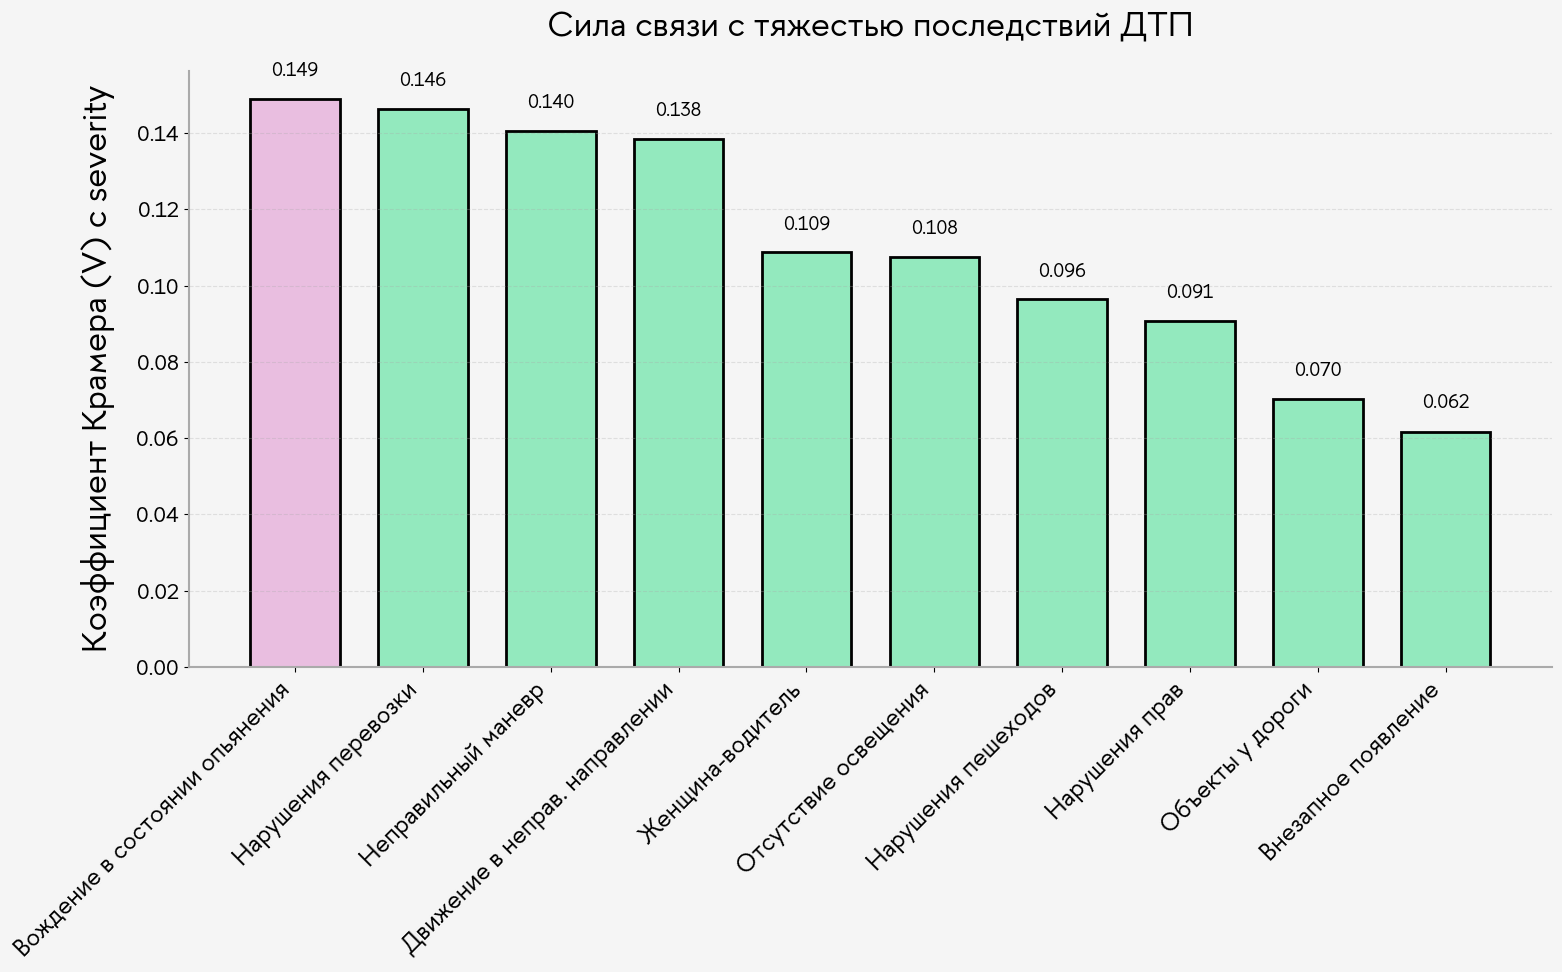

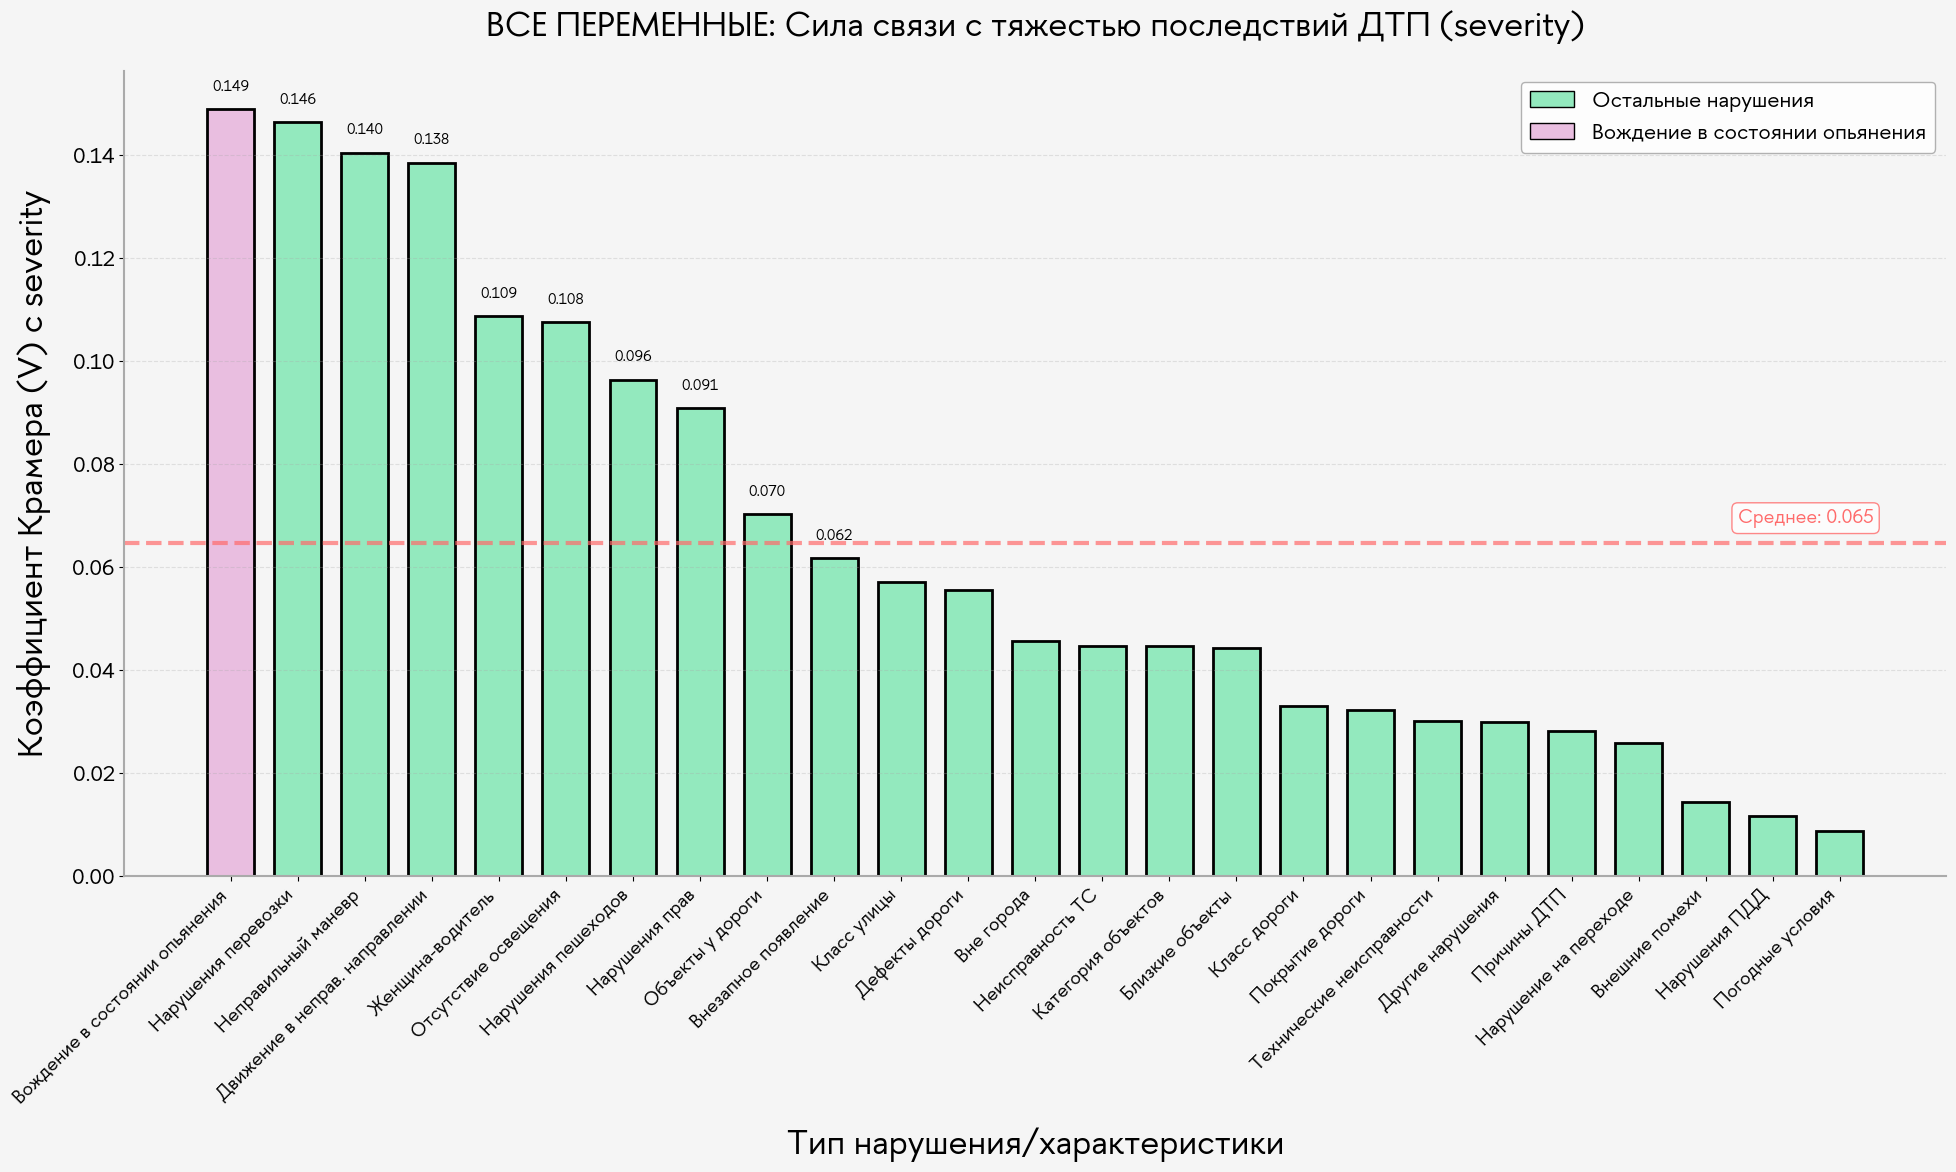


ТАБЛИЦА КОЭФФИЦИЕНТОВ КРАМЕРА С SEVERITY:
Нарушение                           Коэф. Крамера   Сила связи           Ранг      
----------------------------------------------------------------------------------------------------
🟢 Вождение в состоянии опьянения    0.1489          Слабая               1         
🟢 Нарушения перевозки               0.1463          Слабая               2         
🟢 Неправильный маневр               0.1404          Слабая               3         
🟢 Движение в неправ. направлении    0.1384          Слабая               4         
🟢 Женщина-водитель                  0.1087          Слабая               5         
🟢 Отсутствие освещения              0.1075          Слабая               6         
⚪ Нарушения пешеходов               0.0964          Очень слабая         7         
⚪ Нарушения прав                    0.0908          Очень слабая         8         
⚪ Объекты у дороги                  0.0702          Очень слабая         9         
⚪ Внезапное появ

In [38]:
reasons = ['vehicle_failure', 'crossing_violation', 'impaired_driving', 'interference_violation', 
           'license_violation', 'maneuver_violation', 'other_violation', 'pedestrian_violation', 
           'sudden_appearance_violation', 'traffic_control_violation', 'transport_violation', 
           'vehicle_tech_violation', 'wrong_way']

var = reasons + ['no_lighting', 'cause_factors_cat', 'site_objects_cat', 'road_rank_cat', 
                 'road_defects_cat', 'road_surface_cat', 'out_of_town', 'street_rank_cat', 
                 'adj_objects_interpretable', 'adj_objects_cat', 'female_driver', 'weather_cat']

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from pathlib import Path
import numpy as np

# Установка шрифта HSE Sans
font_path = '/Users/aleksejgavrikov/Library/Fonts/HSESans-Regular.otf'
expanded_path = Path(font_path).expanduser()

if expanded_path.exists():
    matplotlib.font_manager.fontManager.addfont(str(expanded_path))
    font_name = matplotlib.font_manager.FontProperties(fname=str(expanded_path)).get_name()
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.size'] = 16
    print(f"Шрифт '{font_name}' установлен, размер 16")
else:
    print("Шрифт HSE Sans не найден, используется системный")
    plt.rcParams['font.size'] = 21

# Функция для расчета коэффициента Крамера
def cramers_v(x, y):
    from scipy.stats import chi2_contingency
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    if min_dim == 0:
        return 0.0
    return np.sqrt(chi2 / (n * min_dim))

# Список нарушений
reasons = var

# Русские названия (укороченные) - ДОБАВЛЕНЫ ВСЕ ПЕРЕМЕННЫЕ
russian_names = {
    # Нарушения и причины
    'vehicle_failure': 'Неисправность ТС',
    'crossing_violation': 'Нарушение на переходе',
    'impaired_driving': 'Вождение в состоянии опьянения',
    'interference_violation': 'Внешние помехи',
    'license_violation': 'Нарушения прав',
    'maneuver_violation': 'Неправильный маневр',
    'other_violation': 'Другие нарушения',
    'pedestrian_violation': 'Нарушения пешеходов',
    'sudden_appearance_violation': 'Внезапное появление',
    'traffic_control_violation': 'Нарушения ПДД',
    'transport_violation': 'Нарушения перевозки',
    'vehicle_tech_violation': 'Технические неисправности',
    'wrong_way': 'Движение в неправ. направлении',
    'no_lighting': 'Отсутствие освещения',
    'cause_factors_cat': 'Причины ДТП',
    
    # Дорожные характеристики
    'site_objects_cat': 'Объекты у дороги',
    'road_rank_cat': 'Класс дороги',
    'road_defects_cat': 'Дефекты дороги',
    'road_surface_cat': 'Покрытие дороги',
    'out_of_town': 'Вне города',
    'street_rank_cat': 'Класс улицы',
    'adj_objects_interpretable': 'Близкие объекты',
    'adj_objects_cat': 'Категория объектов',
    
    # Другие характеристики
    'female_driver': 'Женщина-водитель',
    'weather_cat': 'Погодные условия'
}

# Проверяем наличие severity
if 'severity' not in df.columns:
    print("ОШИБКА: В данных нет колонки 'severity'")
    print(f"Доступные колонки: {list(df.columns)}")
else:
    print(f"severity имеет {df['severity'].nunique()} уникальных значений: {sorted(df['severity'].unique())}")
    
    # Рассчитываем коэффициенты Крамера для каждой пары с severity
    print("Вычисление коэффициентов Крамера с severity...")
    cramer_values = []

    for reason in reasons:
        v = cramers_v(df['severity'], df[reason])
        cramer_values.append({
            'violation': reason,
            'russian_name': russian_names[reason],
            'cramer_v': v
        })

    # Создаем DataFrame и сортируем по убыванию
    cramer_df = pd.DataFrame(cramer_values)
    cramer_df = cramer_df.sort_values('cramer_v', ascending=False)

    print(f"Всего нарушений: {len(cramer_df)}")
    print(f"Минимальный V с severity: {cramer_df['cramer_v'].min():.4f}")
    print(f"Максимальный V с severity: {cramer_df['cramer_v'].max():.4f}")
    print(f"Средний V с severity: {cramer_df['cramer_v'].mean():.4f}")
    
    # Анализ самой сильной и слабой связи
    strongest = cramer_df.iloc[0]
    weakest = cramer_df.iloc[-1]
    print(f"\nСамая сильная связь с severity: {strongest['russian_name']} (V={strongest['cramer_v']:.4f})")
    print(f"Самая слабая связь с severity: {weakest['russian_name']} (V={weakest['cramer_v']:.4f})")
    
    # ==============================================
    # ГРАФИК 1: ТОП-10 ПЕРЕМЕННЫХ
    # ==============================================
    
    # Выбираем топ-10 переменных
    top10_df = cramer_df.head(10).copy()
    
    fig1, ax1 = plt.subplots(figsize=(16, 10))
    fig1.patch.set_facecolor('#F5F5F5')
    ax1.set_facecolor('#F5F5F5')

    # Цвета: все зеленые, кроме impaired_driving (розовый)
    colors1 = []
    for name in top10_df['violation']:
        if name == 'impaired_driving':
            colors1.append('#E9BEE0')  # Розовый для пьяного вождения
        else:
            colors1.append('#93E9BE')  # Зеленый для остальных

    # Барплот
    bars1 = ax1.bar(range(len(top10_df)), top10_df['cramer_v'],
                   color=colors1,
                   edgecolor='#000000',
                   linewidth=2,
                   width=0.7)

    # Настройки
    ax1.set_xlabel('', fontsize=25, fontweight='bold', labelpad=15)
    ax1.set_ylabel('Коэффициент Крамера (V) с severity', fontsize=25, fontweight='bold', labelpad=15)
    ax1.set_title('Сила связи с тяжестью последствий ДТП',
                 fontsize=25, fontweight='bold', pad=25)

    # Устанавливаем подписи по оси X
    ax1.set_xticks(range(len(top10_df)))
    ax1.set_xticklabels([russian_names[name] for name in top10_df['violation']], 
                       rotation=45, ha='right', fontsize=18, fontweight='bold')

    # Значения по оси Y
    ax1.tick_params(axis='y', labelsize=16)

    # Добавляем значения на столбцы
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2,
                height + 0.005,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=14,
                fontweight='bold',
                color='#000000')

    # Убираем рамку
    for spine in ['top', 'right']:
        ax1.spines[spine].set_visible(False)
    ax1.spines['left'].set_color('#AAAAAA')
    ax1.spines['bottom'].set_color('#AAAAAA')
    ax1.spines['left'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)

    # Горизонтальная сетка
    ax1.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA', linewidth=0.8)

    # Добавляем линию среднего
    

    # Легенда для цветов

    plt.tight_layout()
    plt.show()
    
    # ==============================================
    # ГРАФИК 2: ВСЕ ПЕРЕМЕННЫЕ
    # ==============================================
    
    fig2, ax2 = plt.subplots(figsize=(20, 12))  # Увеличиваем размер для всех переменных
    fig2.patch.set_facecolor('#F5F5F5')
    ax2.set_facecolor('#F5F5F5')

    # Цвета: все зеленые, кроме impaired_driving (розовый)
    colors2 = []
    for name in cramer_df['violation']:
        if name == 'impaired_driving':
            colors2.append('#E9BEE0')  # Розовый для пьяного вождения
        else:
            colors2.append('#93E9BE')  # Зеленый для остальных

    # Барплот
    bars2 = ax2.bar(range(len(cramer_df)), cramer_df['cramer_v'],
                   color=colors2,
                   edgecolor='#000000',
                   linewidth=2,
                   width=0.7)

    # Настройки
    ax2.set_xlabel('Тип нарушения/характеристики', fontsize=25, fontweight='bold', labelpad=15)
    ax2.set_ylabel('Коэффициент Крамера (V) с severity', fontsize=25, fontweight='bold', labelpad=15)
    ax2.set_title('ВСЕ ПЕРЕМЕННЫЕ: Сила связи с тяжестью последствий ДТП (severity)',
                 fontsize=25, fontweight='bold', pad=25)

    # Устанавливаем подписи по оси X
    ax2.set_xticks(range(len(cramer_df)))
    ax2.set_xticklabels([russian_names[name] for name in cramer_df['violation']], 
                       rotation=45, ha='right', fontsize=14, fontweight='bold')

    # Значения по оси Y
    ax2.tick_params(axis='y', labelsize=16)

    # Добавляем значения на столбцы (только для топ-10 и импэирд)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        # Добавляем значения только для топ-10 или если значение выше среднего
        if i < 10 or cramer_df.iloc[i]['violation'] == 'impaired_driving':
            ax2.text(bar.get_x() + bar.get_width()/2,
                    height + 0.003,
                    f'{height:.3f}',
                    ha='center',
                    va='bottom',
                    fontsize=11,
                    fontweight='bold',
                    color='#000000')

    # Убираем рамку
    for spine in ['top', 'right']:
        ax2.spines[spine].set_visible(False)
    ax2.spines['left'].set_color('#AAAAAA')
    ax2.spines['bottom'].set_color('#AAAAAA')
    ax2.spines['left'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)

    # Горизонтальная сетка
    ax2.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA', linewidth=0.8)

    # Добавляем линию среднего
    mean_v_all = cramer_df['cramer_v'].mean()
    ax2.axhline(y=mean_v_all, color='#FF6B6B', linestyle='--', linewidth=3, alpha=0.7)
    
    # Подпись средней линии
    ax2.text(len(cramer_df) * 0.98, mean_v_all + 0.003,
            f'Среднее: {mean_v_all:.3f}',
            ha='right',
            va='bottom',
            fontsize=14,
            fontweight='bold',
            color='#FF6B6B',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='#FF6B6B'))

    # Легенда для цветов
    legend_elements2 = [
        Patch(facecolor='#93E9BE', edgecolor='#000000', label='Остальные нарушения'),
        Patch(facecolor='#E9BEE0', edgecolor='#000000', label='Вождение в состоянии опьянения')
    ]
    
    ax2.legend(handles=legend_elements2, 
               loc='upper right', 
               fontsize=16,
               frameon=True,
               framealpha=0.9,
               edgecolor='#AAAAAA')

    plt.tight_layout()
    plt.show()

    # Выводим таблицу с данными
    print("\n" + "="*100)
    print("ТАБЛИЦА КОЭФФИЦИЕНТОВ КРАМЕРА С SEVERITY:")
    print("="*100)
    print(f"{'Нарушение':<35} {'Коэф. Крамера':<15} {'Сила связи':<20} {'Ранг':<10}")
    print("-"*100)

    for rank, (_, row) in enumerate(cramer_df.iterrows(), 1):
        v = row['cramer_v']
        # Интерпретация силы связи
        if v < 0.1:
            interpretation = "Очень слабая"
            color_code = "⚪"
        elif v < 0.3:
            interpretation = "Слабая"
            color_code = "🟢"
        elif v < 0.5:
            interpretation = "Умеренная"
            color_code = "🟡"
        else:
            interpretation = "Сильная"
            color_code = "🔴"
        
        print(f"{color_code} {row['russian_name']:<33} {v:<15.4f} {interpretation:<20} {rank:<10}")

    print("="*100)
    
    # Выводим отдельно ТОП-10
    print("\n" + "="*80)
    print("ТОП-10 ПЕРЕМЕННЫХ ПО СИЛЕ СВЯЗИ С SEVERITY:")
    print("="*80)
    for rank, (_, row) in enumerate(top10_df.iterrows(), 1):
        v = row['cramer_v']
        if v < 0.1:
            interpretation = "Очень слабая"
        elif v < 0.3:
            interpretation = "Слабая"
        elif v < 0.5:
            interpretation = "Умеренная"
        else:
            interpretation = "Сильная"
        
        print(f"{rank:>2}. {row['russian_name']:<35} V={v:.4f} ({interpretation})")
    print("="*80)
    
    # Анализ положения impaired_driving
    impaired_rank = list(cramer_df['violation']).index('impaired_driving') + 1
    impaired_value = cramer_df[cramer_df['violation'] == 'impaired_driving'].iloc[0]['cramer_v']
    print(f"\nВождение в состоянии опьянения (impaired_driving):")
    print(f"  • Ранг: {impaired_rank} из {len(cramer_df)}")
    print(f"  • Коэффициент Крамера: {impaired_value:.4f}")
    if impaired_rank <= 10:
        print(f"  • Входит в ТОП-10 (место №{impaired_rank})")
    else:
        print(f"  • НЕ входит в ТОП-10")
    
    # Дополнительный анализ: связь с разными уровнями severity
    print("\n" + "="*60)
    print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ:")
    print("="*60)
    
    # Создаем бинарные переменные для каждого уровня severity
    severity_levels = sorted(df['severity'].unique())
    print(f"Уровни severity в данных: {severity_levels}")
    
    # Для каждого нарушения смотрим связь с каждым уровнем severity
    for reason in ['impaired_driving', cramer_df.iloc[0]['violation'], cramer_df.iloc[-1]['violation']]:
        print(f"\nНарушение: {russian_names[reason]}")
        for level in severity_levels:
            # Создаем бинарную переменную для данного уровня severity
            severity_binary = (df['severity'] == level).astype(int)
            v = cramers_v(severity_binary, df[reason])
            print(f"  • Связь с severity={level}: V={v:.4f}")


СТОЛБЧАТАЯ ДИАГРАММА С НАКОПЛЕНИЕМ
ДОЛЯ ПЬЯНЫХ ВОДИТЕЛЕЙ ПО ТИПАМ ДОРОГ
(пьяные - снизу, трезвые - сверху)

Таблица абсолютных значений:
impaired_driving     не пьяный  пьяный
road_rank_cat                         
Федеральные дороги      154692   20100
Региональные дороги     207790   51099
Местные дороги           16981    6303

Таблица в процентах (по строкам):
impaired_driving     не пьяный  пьяный
road_rank_cat                         
Федеральные дороги        88.5    11.5
Региональные дороги       80.3    19.7
Местные дороги            72.9    27.1

ВЕРТИКАЛЬНАЯ ДИАГРАММА С НАКОПЛЕНИЕМ
(пьяные - снизу, трезвые - сверху)


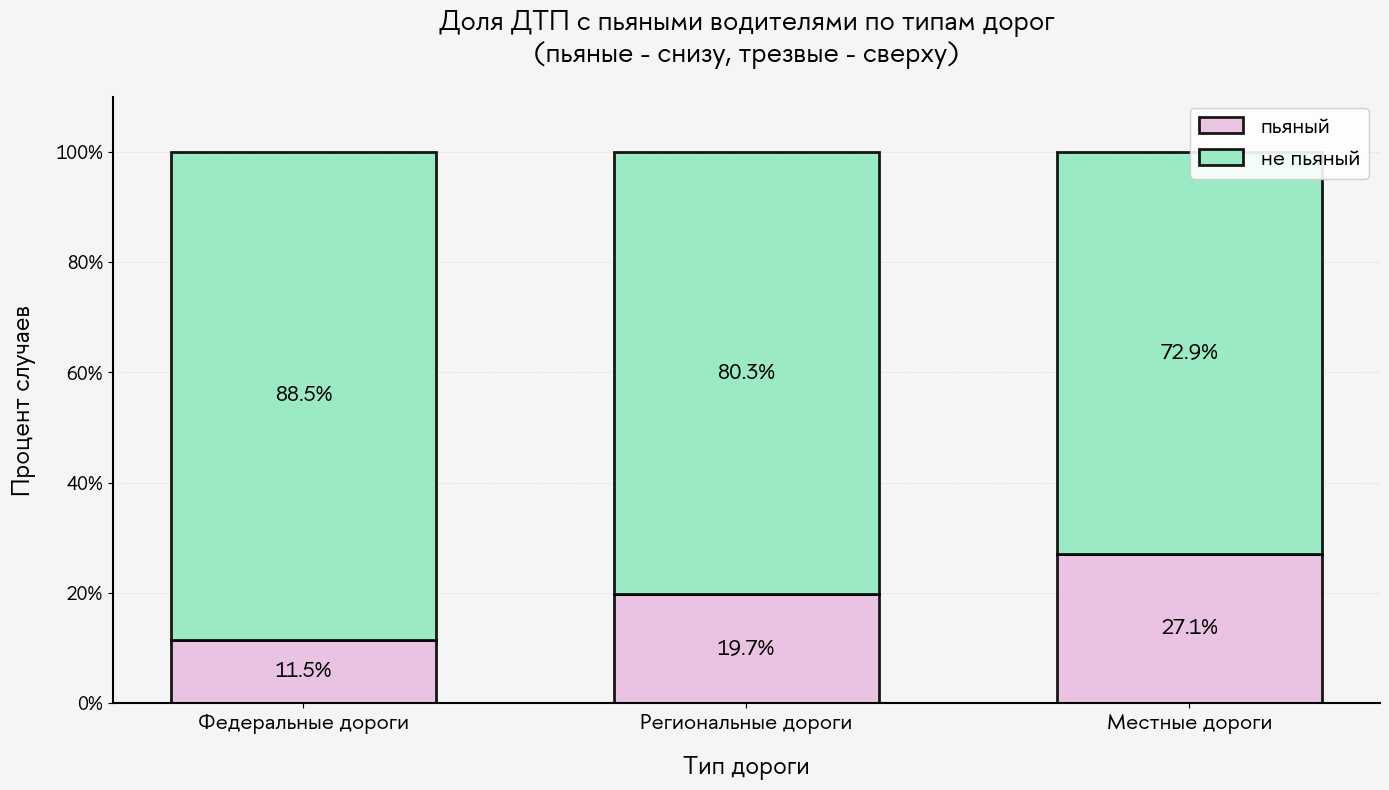

In [16]:
import os

light_pink = '#E9BEE0'
light_green = '#93E9BE'
black = '#000000'
background = '#F5F5F5'

print("\n" + "="*80)
print("СТОЛБЧАТАЯ ДИАГРАММА С НАКОПЛЕНИЕМ")
print("ДОЛЯ ПЬЯНЫХ ВОДИТЕЛЕЙ ПО ТИПАМ ДОРОГ")
print("(пьяные - снизу, трезвые - сверху)")
print("="*80)
contingency_table = pd.crosstab(df['road_rank_cat'], df['impaired_driving'])

contingency_table = contingency_table.rename(columns={0: 'не пьяный', 1: 'пьяный'})

road_name_mapping = {
    'Местного значения (дорога местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)': 'Местные дороги',
    'Региональная или межмуниципальная (дорога регионального или межмуниципального значения)': 'Региональные дороги',
    'Федеральная (дорога федерального значения)': 'Федеральные дороги'
}

contingency_table = contingency_table.rename(index=road_name_mapping)

desired_order = ['Федеральные дороги', 'Региональные дороги', 'Местные дороги']
contingency_table = contingency_table.reindex(desired_order)

print("\nТаблица абсолютных значений:")
print(contingency_table)

contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nТаблица в процентах (по строкам):")
print(contingency_table_percent.round(1))


print("\n" + "="*80)
print("ВЕРТИКАЛЬНАЯ ДИАГРАММА С НАКОПЛЕНИЕМ")
print("(пьяные - снизу, трезвые - сверху)")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

categories = contingency_table_percent.index.tolist()
x_positions = np.arange(len(categories))

bar_width = 0.6

bars_drunk = ax.bar(x_positions, 
                    contingency_table_percent['пьяный'], 
                    width=bar_width, 
                    color=light_pink, 
                    edgecolor=black, 
                    linewidth=2, 
                    label='пьяный',
                    alpha=0.9)
bars_sober = ax.bar(x_positions, 
                    contingency_table_percent['не пьяный'], 
                    width=bar_width, 
                    bottom=contingency_table_percent['пьяный'],  # Накопление от значения пьяных
                    color=light_green, 
                    edgecolor=black, 
                    linewidth=2, 
                    label='не пьяный',
                    alpha=0.9)

for i, road_type in enumerate(categories):
    drunk_value = contingency_table_percent.loc[road_type, 'пьяный']
    sober_value = contingency_table_percent.loc[road_type, 'не пьяный']
    
    drunk_label_y = drunk_value / 2
    
    sober_label_y = drunk_value + sober_value / 2
    
    ax.text(x_positions[i], drunk_label_y, 
            f'{drunk_value:.1f}%', 
            ha='center', va='center',
            fontsize=16, fontweight='bold', color=black)
    
    ax.text(x_positions[i], sober_label_y, 
            f'{sober_value:.1f}%', 
            ha='center', va='center',
            fontsize=16, fontweight='bold', color=black)
    
   
ax.set_title('Доля ДТП с пьяными водителями по типам дорог\n(пьяные - снизу, трезвые - сверху)',
            fontsize=20, fontweight='bold', pad=25)

ax.set_xlabel('Тип дороги', fontsize=18, fontweight='bold', labelpad=15)
ax.set_ylabel('Процент случаев', fontsize=18, fontweight='bold', labelpad=15)

ax.set_xticks(x_positions)
ax.set_xticklabels(categories, fontsize=16, fontweight='bold')

ax.legend(loc='upper right', fontsize=16, framealpha=0.9)

ax.set_ylim(0, 110)

ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f'{i}%' for i in range(0, 101, 20)], fontsize=14)

ax.yaxis.grid(True, linestyle='--', alpha=0.3, linewidth=0.5)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)



plt.tight_layout()
plt.show()

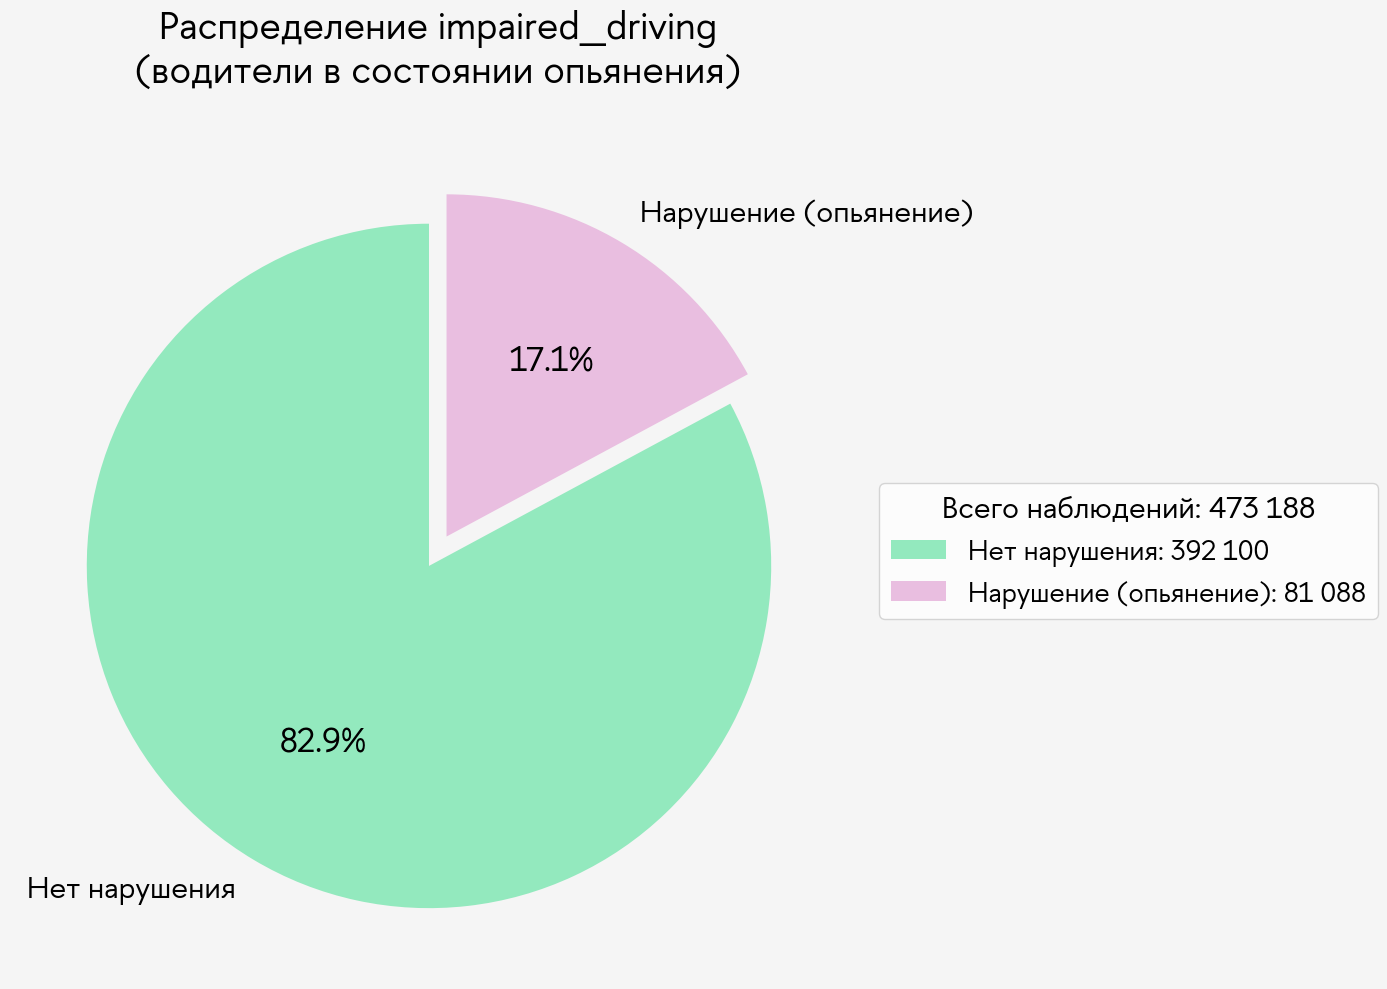


СТАТИСТИКА ПО impaired_driving:
Всего наблюдений: 473 188
Количество нарушений (impaired_driving = 1): 81 088
Количество без нарушений (impaired_driving = 0): 392 100
Процент нарушений: 17.14%
Процент без нарушений: 82.86%


In [15]:
impaired_counts = df['impaired_driving'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

labels = ['Нет нарушения', 'Нарушение (опьянение)']
sizes = impaired_counts.values
colors_pie = ['#93E9BE', '#E9BEE0']
explode = (0.05, 0.05)

wedges, texts, autotexts = ax.pie(sizes, 
                                  explode=explode, 
                                  labels=labels, 
                                  colors=colors_pie,
                                  autopct='%1.1f%%',
                                  shadow=False,
                                  startangle=90,
                                  textprops={'fontsize': 20, 'fontweight': 'bold'})

for autotext in autotexts:
    autotext.set_color('#000000')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(24)

for text in texts:
    text.set_fontsize(22)
    text.set_fontweight('bold')

ax.set_title('Распределение impaired_driving\n(водители в состоянии опьянения)', 
             fontsize=28, fontweight='bold', pad=30)

legend_labels = [f'{label}: {size:,}'.replace(',', ' ') for label, size in zip(labels, sizes)]
legend = ax.legend(wedges, legend_labels, 
          title=f"Всего наблюдений: {impaired_counts.sum():,}".replace(',', ' '),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=20,
          title_fontsize=22)

legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("СТАТИСТИКА ПО impaired_driving:")
print("="*80)
print(f"Всего наблюдений: {len(df):,}".replace(',', ' '))
print(f"Количество нарушений (impaired_driving = 1): {impaired_counts.get(1, 0):,}".replace(',', ' '))
print(f"Количество без нарушений (impaired_driving = 0): {impaired_counts.get(0, 0):,}".replace(',', ' '))
print(f"Процент нарушений: {(impaired_counts.get(1, 0)/len(df)*100):.2f}%")
print(f"Процент без нарушений: {(impaired_counts.get(0, 0)/len(df)*100):.2f}%")
print("="*80)

Доступные переменные: 20 из 20

Вычисление коэффициентов Крамера с impaired_driving...

Всего проанализировано: 11 переменных
Максимальный V: 0.1235
Минимальный V: 0.0400
Средний V: 0.0677

Самая сильная связь: Тип дороги (Дорога), V=0.1235
Самая слабая связь: Класс улицы (Дорога), V=0.0400


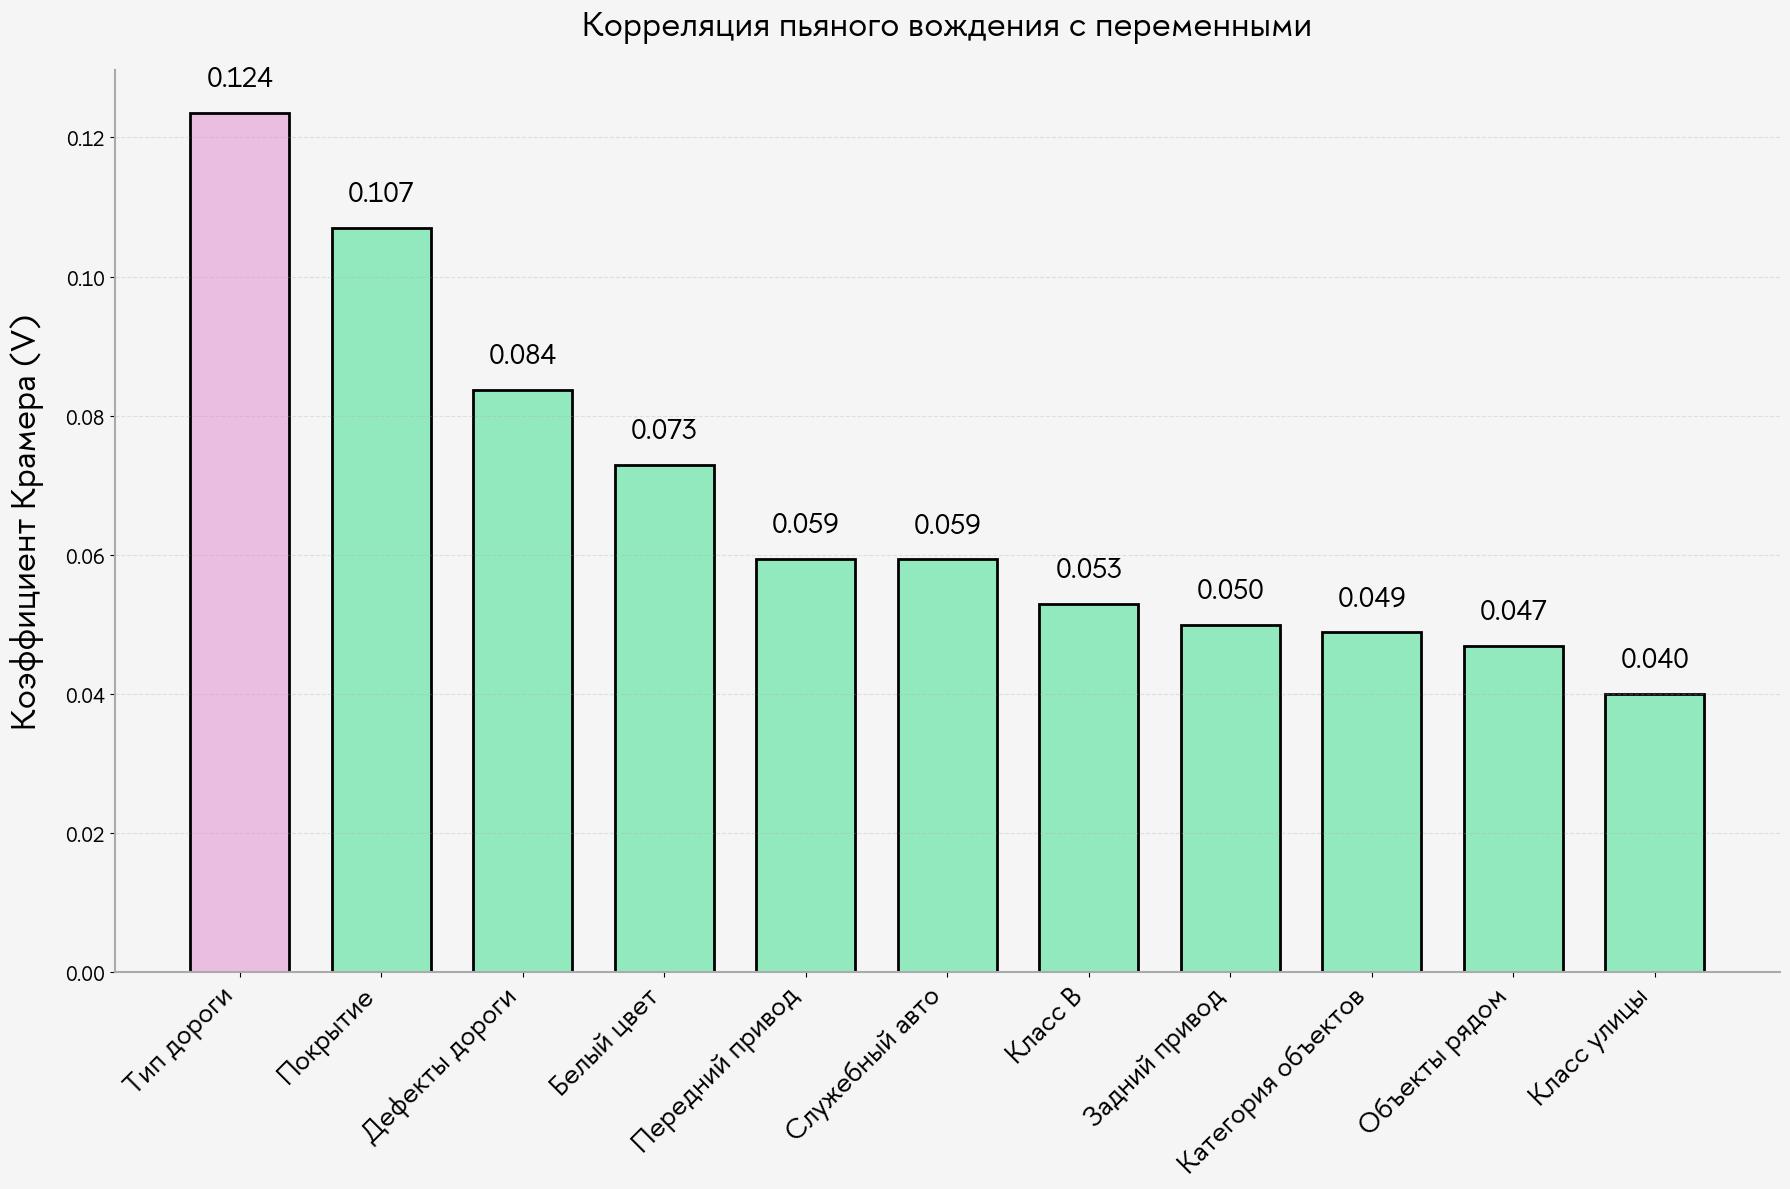


ТАБЛИЦА КОЭФФИЦИЕНТОВ КРАМЕРА С IMPAIRED_DRIVING:
Тип          Характеристика                      Коэф. Крамера   Сила связи           Ранг      
----------------------------------------------------------------------------------------------------
🟢 Дорога     Тип дороги                        0.1235          Слабая               1         
🟢 Дорога     Покрытие                          0.1070          Слабая               2         
⚪ Дорога     Дефекты дороги                    0.0837          Очень слабая         3         
⚪ Автомобиль Белый цвет                        0.0729          Очень слабая         4         
⚪ Автомобиль Передний привод                   0.0594          Очень слабая         5         
⚪ Автомобиль Служебный авто                    0.0594          Очень слабая         6         
⚪ Автомобиль Класс B                           0.0530          Очень слабая         7         
⚪ Автомобиль Задний привод                     0.0500          Очень слабая         8 

In [17]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    if min_dim == 0:
        return 0.0
    return np.sqrt(chi2 / (n * min_dim))

car_description = ['non_private_vehicle', 'white_vehicle', 'black_vehicle', 'colored_vehicle', 
                   'n_class_a', 'n_class_b', 'n_class_c', 'n_class_d', 
                   'n_class_e', 'n_class_s', 'n_front_drive', 'n_rear_drive', 'n_4wd']
road_description = ['road_rank_cat', 'road_defects_cat', 'road_surface_cat', 'out_of_town', 'street_rank_cat', 
                    'adj_objects_interpretable', 'adj_objects_cat']

russian_names = {
    'non_private_vehicle': 'Служебный авто',
    'white_vehicle': 'Белый цвет',
    'black_vehicle': 'Черный цвет',
    'colored_vehicle': 'Цветной авто',
    'n_class_a': 'Класс A',
    'n_class_b': 'Класс B',
    'n_class_c': 'Класс C',
    'n_class_d': 'Класс D',
    'n_class_e': 'Класс E',
    'n_class_s': 'Класс S',
    'n_front_drive': 'Передний привод',
    'n_rear_drive': 'Задний привод',
    'n_4wd': 'Полный привод',
    
    'road_rank_cat': 'Тип дороги',
    'road_defects_cat': 'Дефекты дороги',
    'road_surface_cat': 'Покрытие',
    'out_of_town': 'Вне города',
    'street_rank_cat': 'Класс улицы',
    'adj_objects_interpretable': 'Объекты рядом',
    'adj_objects_cat': 'Категория объектов'
}

all_variables = car_description + road_description
available_vars = [var for var in all_variables if var in df.columns]
print(f"Доступные переменные: {len(available_vars)} из {len(all_variables)}")

if 'impaired_driving' not in df.columns:
    print("ОШИБКА: В данных нет колонки 'impaired_driving'")
else:
    print("\nВычисление коэффициентов Крамера с impaired_driving...")
    cramer_values = []
    
    for variable in available_vars:
        v = cramers_v(df['impaired_driving'], df[variable])
        cramer_values.append({
            'variable': variable,
            'russian_name': russian_names.get(variable, variable),
            'type': 'Автомобиль' if variable in car_description else 'Дорога',
            'cramer_v': v
        })
    
    cramer_df = pd.DataFrame(cramer_values)
    cramer_df = cramer_df.sort_values('cramer_v', ascending=False)
    
    cramer_df = cramer_df.head(11)
    
    print(f"\nВсего проанализировано: {len(cramer_df)} переменных")
    print(f"Максимальный V: {cramer_df['cramer_v'].max():.4f}")
    print(f"Минимальный V: {cramer_df['cramer_v'].min():.4f}")
    print(f"Средний V: {cramer_df['cramer_v'].mean():.4f}")
    
    strongest = cramer_df.iloc[0]
    weakest = cramer_df.iloc[-1]
    print(f"\nСамая сильная связь: {strongest['russian_name']} ({strongest['type']}), V={strongest['cramer_v']:.4f}")
    print(f"Самая слабая связь: {weakest['russian_name']} ({weakest['type']}), V={weakest['cramer_v']:.4f}")
    
    fig, ax = plt.subplots(figsize=(18, 12))
    fig.patch.set_facecolor('#F5F5F5')
    ax.set_facecolor('#F5F5F5')
    
    colors = []
    for var_name in cramer_df['variable']:
        if var_name == 'road_rank_cat':
            colors.append('#E9BEE0')
        else:
            colors.append('#93E9BE')
    
    bars = ax.bar(range(len(cramer_df)), cramer_df['cramer_v'],
                  color=colors,
                  edgecolor='#000000',
                  linewidth=2,
                  width=0.7)
    
    
    ax.set_ylabel('Коэффициент Крамера (V)', fontsize=25, fontweight='bold', labelpad=15)
    ax.set_title('Корреляция пьяного вождения с переменными',
                fontsize=25, fontweight='bold', pad=25)

    ax.set_xticks(range(len(cramer_df)))
    ax.set_xticklabels([russian_names[name] for name in cramer_df['variable']], 
                      rotation=45, ha='right', fontsize=20, fontweight='bold')
    
    plt.yticks(fontsize=15)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,
                height + 0.003,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=20,
                fontweight='bold',
                color='#000000')
    
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    ax.spines['left'].set_color('#AAAAAA')
    ax.spines['bottom'].set_color('#AAAAAA')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA', linewidth=0.8)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*100)
    print("ТАБЛИЦА КОЭФФИЦИЕНТОВ КРАМЕРА С IMPAIRED_DRIVING:")
    print("="*100)
    print(f"{'Тип':<12} {'Характеристика':<35} {'Коэф. Крамера':<15} {'Сила связи':<20} {'Ранг':<10}")
    print("-"*100)
    
    for rank, (_, row) in enumerate(cramer_df.iterrows(), 1):
        v = row['cramer_v']
        if v < 0.1:
            interpretation = "Очень слабая"
            color_code = "⚪"
        elif v < 0.3:
            interpretation = "Слабая"
            color_code = "🟢"
        elif v < 0.5:
            interpretation = "Умеренная"
            color_code = "🟡"
        else:
            interpretation = "Сильная"
            color_code = "🔴"
        
        print(f"{color_code} {row['type']:<10} {row['russian_name']:<33} {v:<15.4f} {interpretation:<20} {rank:<10}")
    
    print("="*100)
    
    print("\n" + "="*80)
    print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ПО ТИПАМ:")
    print("="*80)
    
    car_df = cramer_df[cramer_df['type'] == 'Автомобиль']
    if not car_df.empty:
        print(f"\nАВТОМОБИЛИ (всего {len(car_df)}):")
        print(f"Средний V: {car_df['cramer_v'].mean():.4f}")
        print(f"Максимальный V: {car_df['cramer_v'].max():.4f} ({car_df.iloc[0]['russian_name']})")
        print(f"Минимальный V: {car_df['cramer_v'].min():.4f} ({car_df.iloc[-1]['russian_name']})")
    
    road_df = cramer_df[cramer_df['type'] == 'Дорога']
    if not road_df.empty:
        print(f"\nДОРОГИ (всего {len(road_df)}):")
        print(f"Средний V: {road_df['cramer_v'].mean():.4f}")
        print(f"Максимальный V: {road_df['cramer_v'].max():.4f} ({road_df.iloc[0]['russian_name']})")
        print(f"Минимальный V: {road_df['cramer_v'].min():.4f} ({road_df.iloc[-1]['russian_name']})")
        
        road_rank_row = cramer_df[cramer_df['variable'] == 'road_rank_cat']
        if not road_rank_row.empty:
            v_road_rank = road_rank_row.iloc[0]['cramer_v']
            rank_road_rank = list(cramer_df['variable']).index('road_rank_cat') + 1
            print(f"\nКласс дороги (road_rank_cat):")
            print(f"  • Коэффициент Крамера: {v_road_rank:.4f}")
            print(f"  • Общий ранг: {rank_road_rank} из {len(cramer_df)}")
            print(f"  • Ранг среди дорог: {list(road_df['variable']).index('road_rank_cat') + 1} из {len(road_df)}")
    
    print("\n" + "="*80)
    
    print("\n" + "="*80)
    print("СВОДНЫЕ ВЫВОДЫ:")
    print("="*80)
    
    print("\nНаиболее сильные связи с вождением в состоянии опьянения:")
    for i, (_, row) in enumerate(cramer_df.head(5).iterrows(), 1):
        print(f"{i}. {row['russian_name']} ({row['type']}): V={row['cramer_v']:.4f}")
    
    if 'road_rank_cat' in cramer_df['variable'].values:
        road_rank_info = cramer_df[cramer_df['variable'] == 'road_rank_cat'].iloc[0]
        print(f"\nОсобый интерес: Класс дороги (road_rank_cat)")
        print(f"• Расположен на {list(cramer_df['variable']).index('road_rank_cat') + 1} месте из {len(cramer_df)}")
        print(f"• Сила связи: {road_rank_info['cramer_v']:.4f}")

In [23]:
replace_dict = {
    'Местного значения (дороги местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)': 
    'Местного значения (дорога местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)',
    'Частная (дороги, относящиеся к частной и иным формам собственности)':
    'Частная (дорога, относящиеся к частной и иным формам собственности)',
    'Иная дорога': 'Другие места'
}
df['road_rank_cat'] = df['road_rank_cat'].replace(replace_dict)
print(df['road_rank_cat'].value_counts())

road_rank_cat
Региональная или межмуниципальная (дорога регионального или межмуниципального значения)                                                  258889
Федеральная (дорога федерального значения)                                                                                               174792
Местного значения (дорога местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)     34676
Не указано                                                                                                                                 1965
Другие места                                                                                                                               1809
Частная (дорога, относящиеся к частной и иным формам собственности)                                                                        1057
Name: count, dtype: int64


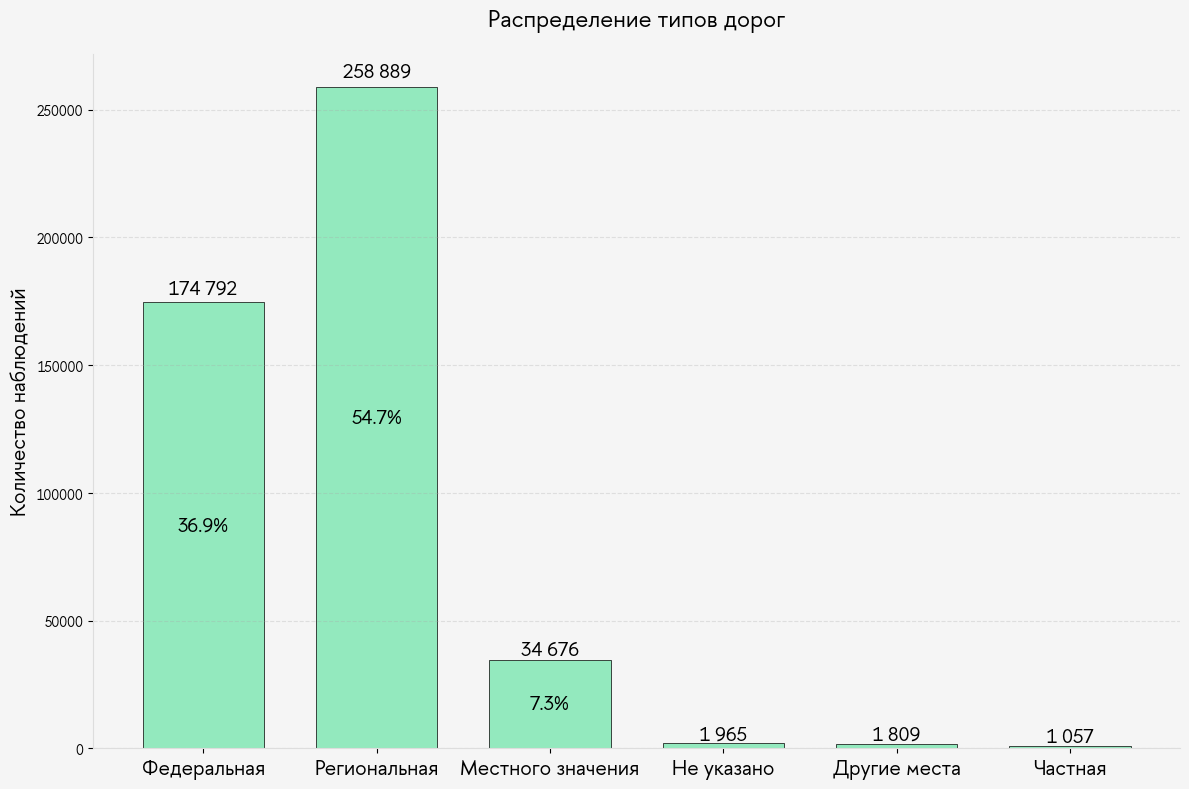

In [26]:
desired_order = [
    'Федеральная (дорога федерального значения)',
    'Региональная или межмуниципальная (дорога регионального или межмуниципального значения)',
    'Местного значения (дорога местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)'
]

value_counts = df['road_rank_cat'].value_counts()
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['road_rank_cat', 'count']

def get_sort_order(category):
    category_str = str(category)
    for i, desired in enumerate(desired_order):
        if desired in category_str:
            return i
    return len(desired_order)

value_counts_df['sort_order'] = value_counts_df['road_rank_cat'].apply(get_sort_order)
value_counts_df = value_counts_df.sort_values('sort_order')

ordered_counts = value_counts_df.set_index('road_rank_cat')['count']

total = ordered_counts.sum()
percentages = (ordered_counts.values / total * 100).round(1)

short_names = []
for name in ordered_counts.index:
    name_str = str(name)
    if '(' in name_str:
        short_name = name_str.split('(')[0].strip()
        if short_name == 'Региональная или межмуниципальная':
            short_name = 'Региональная'
    else:
        short_name = name_str
    short_names.append(short_name)

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

colors = ['#93E9BE', '#93E9BE', '#93E9BE']

bars = ax.bar(
    short_names,
    ordered_counts.values,
    color=colors,
    width=0.7,
    edgecolor='#000000',
    linewidth=0.5
)

ax.set_ylabel('Количество наблюдений', fontsize=15)
ax.set_title('Распределение типов дорог', fontsize=17, fontweight='bold', pad=20)

plt.xticks(rotation=0, fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

ax.grid(axis='y', linestyle='--', alpha=0.3, color='#AAAAAA')

for i, bar in enumerate(bars):
    height = bar.get_height()
    percent = percentages[i]
    text_color = 'black'
    
    if i <= 2:
        ax.text(bar.get_x() + bar.get_width()/2,
                height / 2,
                f'{percent}%',
                ha='center',
                va='center',
                fontsize=14,
                fontweight='bold',
                color=text_color)
    
    ax.text(bar.get_x() + bar.get_width()/2,
            height + height * 0.01,
            f'{int(height):,}'.replace(',', ' '),
            ha='center',
            va='bottom',
            fontsize=14,
            fontweight='medium')

plt.tight_layout()
plt.show()


СТОЛБЧАТАЯ ДИАГРАММА С НАКОПЛЕНИЕМ
ДОЛЯ ПЬЯНЫХ ВОДИТЕЛЕЙ ПО ТИПАМ ДОРОГ
(пьяные - снизу, трезвые - сверху)

Таблица абсолютных значений:
impaired_driving     не пьяный  пьяный
road_rank_cat                         
Федеральные дороги      154692   20100
Региональные дороги     207790   51099
Местные дороги           25697    8979

Таблица в процентах (по строкам):
impaired_driving     не пьяный  пьяный
road_rank_cat                         
Федеральные дороги        88.5    11.5
Региональные дороги       80.3    19.7
Местные дороги            74.1    25.9

ВЕРТИКАЛЬНАЯ ДИАГРАММА С НАКОПЛЕНИЕМ
(пьяные - снизу, трезвые - сверху)


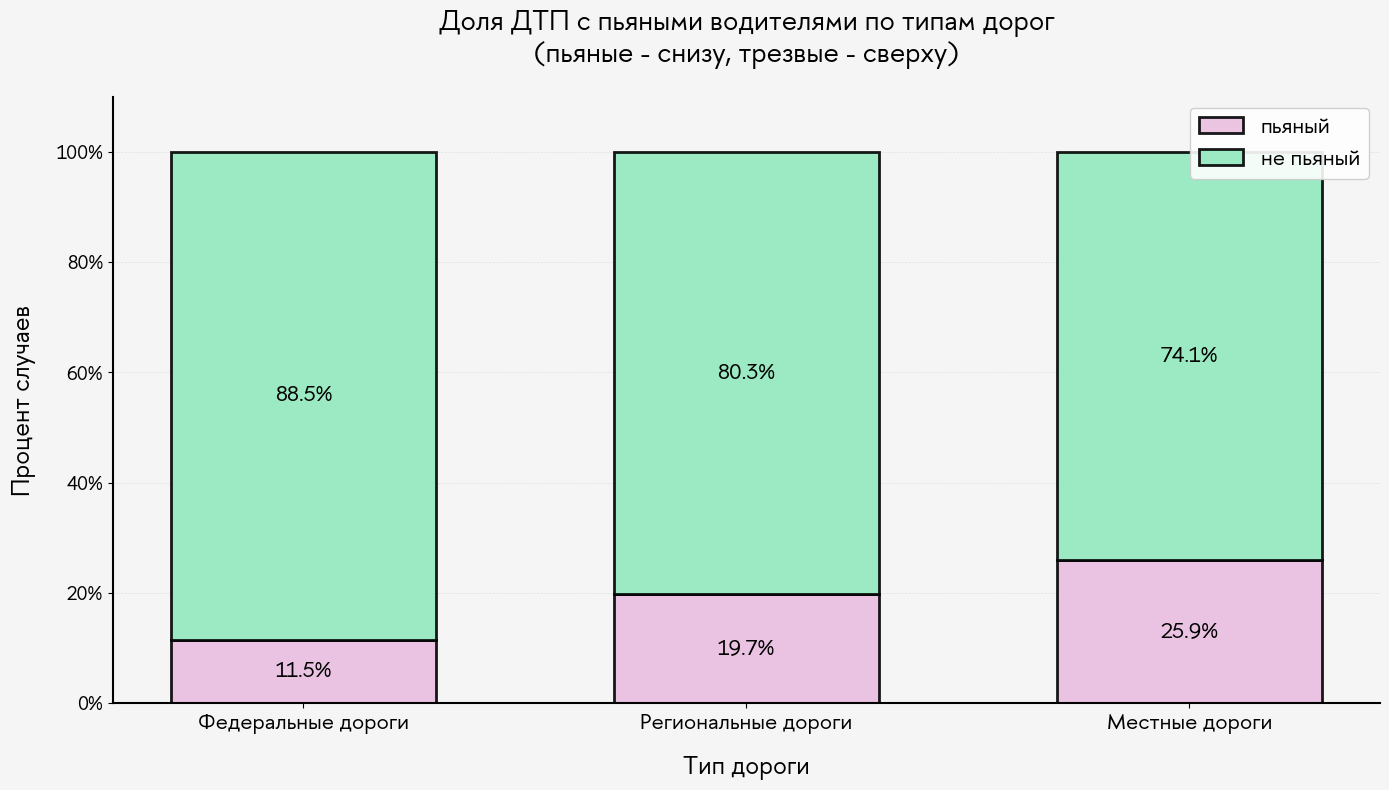

In [27]:
light_pink = '#E9BEE0'
light_green = '#93E9BE'
black = '#000000'
background = '#F5F5F5'
print("\n" + "="*80)
print("СТОЛБЧАТАЯ ДИАГРАММА С НАКОПЛЕНИЕМ")
print("ДОЛЯ ПЬЯНЫХ ВОДИТЕЛЕЙ ПО ТИПАМ ДОРОГ")
print("(пьяные - снизу, трезвые - сверху)")
print("="*80)

contingency_table = pd.crosstab(df['road_rank_cat'], df['impaired_driving'])

contingency_table = contingency_table.rename(columns={0: 'не пьяный', 1: 'пьяный'})

road_name_mapping = {
    'Местного значения (дорога местного значения, включая относящиеся к собственности поселений, муниципальных районов, городских округов)': 'Местные дороги',
    'Региональная или межмуниципальная (дорога регионального или межмуниципального значения)': 'Региональные дороги',
    'Федеральная (дорога федерального значения)': 'Федеральные дороги'
}
contingency_table = contingency_table.rename(index=road_name_mapping)

desired_order = ['Федеральные дороги', 'Региональные дороги', 'Местные дороги']
contingency_table = contingency_table.reindex(desired_order)

print("\nТаблица абсолютных значений:")
print(contingency_table)

contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nТаблица в процентах (по строкам):")
print(contingency_table_percent.round(1))


print("\n" + "="*80)
print("ВЕРТИКАЛЬНАЯ ДИАГРАММА С НАКОПЛЕНИЕМ")
print("(пьяные - снизу, трезвые - сверху)")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

categories = contingency_table_percent.index.tolist()
x_positions = np.arange(len(categories))

bar_width = 0.6

bars_drunk = ax.bar(x_positions, 
                    contingency_table_percent['пьяный'], 
                    width=bar_width, 
                    color=light_pink, 
                    edgecolor=black, 
                    linewidth=2, 
                    label='пьяный',
                    alpha=0.9)
bars_sober = ax.bar(x_positions, 
                    contingency_table_percent['не пьяный'], 
                    width=bar_width, 
                    bottom=contingency_table_percent['пьяный'],
                    color=light_green, 
                    edgecolor=black, 
                    linewidth=2, 
                    label='не пьяный',
                    alpha=0.9)

for i, road_type in enumerate(categories):
    drunk_value = contingency_table_percent.loc[road_type, 'пьяный']
    sober_value = contingency_table_percent.loc[road_type, 'не пьяный']
    
    drunk_label_y = drunk_value / 2
    
    sober_label_y = drunk_value + sober_value / 2
    

    ax.text(x_positions[i], drunk_label_y, 
            f'{drunk_value:.1f}%', 
            ha='center', va='center',
            fontsize=16, fontweight='bold', color=black)
    
    ax.text(x_positions[i], sober_label_y, 
            f'{sober_value:.1f}%', 
            ha='center', va='center',
            fontsize=16, fontweight='bold', color=black)
    
   
ax.set_title('Доля ДТП с пьяными водителями по типам дорог\n(пьяные - снизу, трезвые - сверху)',
            fontsize=20, fontweight='bold', pad=25)

ax.set_xlabel('Тип дороги', fontsize=18, fontweight='bold', labelpad=15)
ax.set_ylabel('Процент случаев', fontsize=18, fontweight='bold', labelpad=15)

ax.set_xticks(x_positions)
ax.set_xticklabels(categories, fontsize=16, fontweight='bold')

ax.legend(loc='upper right', fontsize=16, framealpha=0.9)

ax.set_ylim(0, 110)

ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels([f'{i}%' for i in range(0, 101, 20)], fontsize=14)

ax.yaxis.grid(True, linestyle='--', alpha=0.3, linewidth=0.5)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)



plt.tight_layout()
plt.show()

/var/folders/nv/y1xwhy_x1gx4gn0wks7mdjqc0000gn/T/ipykernel_42486/2895010902.py:71: UserWarning: Glyph 8595 (\N{DOWNWARDS ARROW}) missing from font(s) HSE Sans.
  plt.tight_layout()
/Users/aleksejgavrikov/dtp_analisys/venv/lib/python3.11/site-packages/IPython/core/events.py:96: UserWarning: Glyph 8595 (\N{DOWNWARDS ARROW}) missing from font(s) HSE Sans.
  func(*args, **kwargs)
/Users/aleksejgavrikov/dtp_analisys/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8595 (\N{DOWNWARDS ARROW}) missing from font(s) HSE Sans.
  fig.canvas.print_figure(bytes_io, **kw)


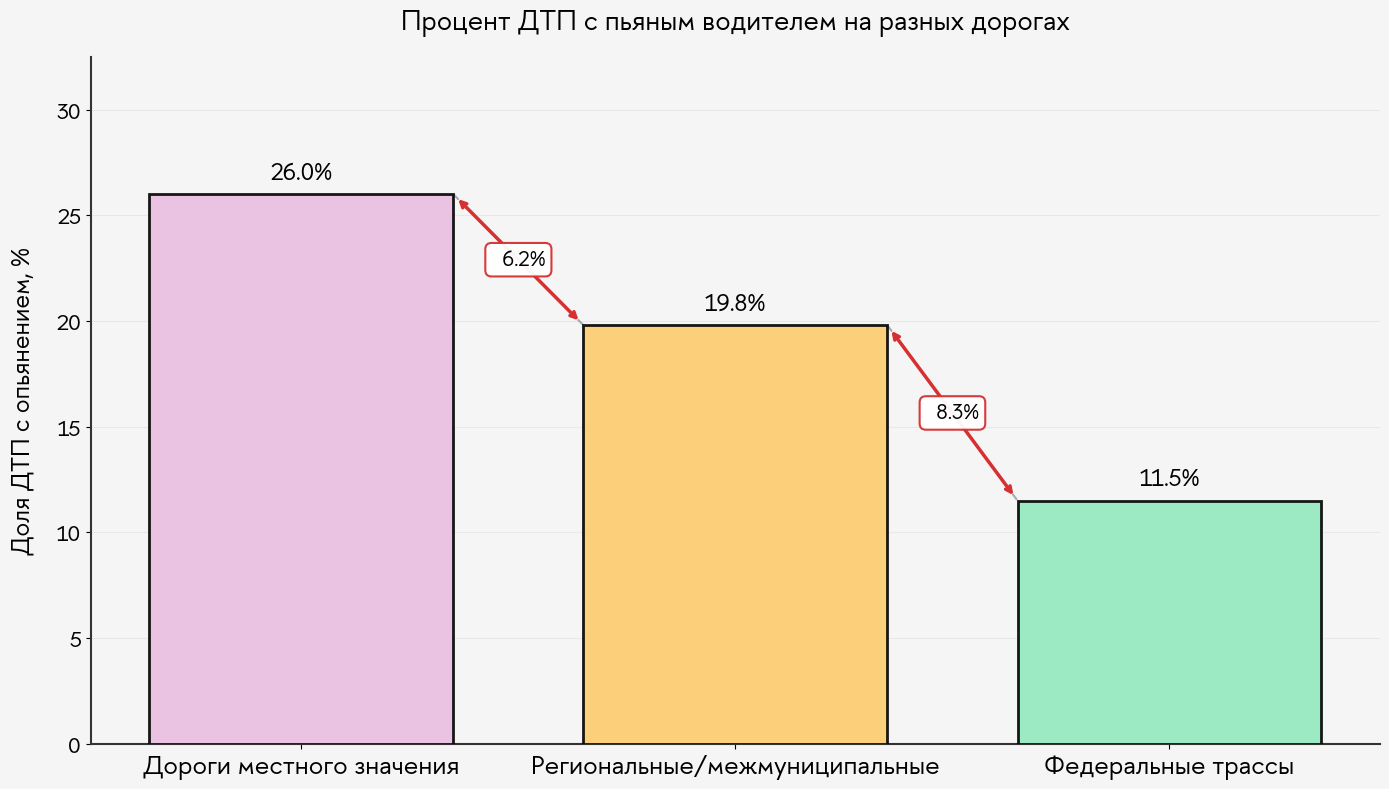

In [28]:
data = {
    'Категория дороги': [
        'Дороги местного значения',
        'Региональные/межмуниципальные',
        'Федеральные трассы'
    ],
    'Доля ДТП с опьянением (%)': [26.0, 19.8, 11.5]
}

df_summary = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')
x_pos = np.arange(len(df_summary))
width = 0.7

colors = ['#E9BEE0', '#fdcb6e', '#93E9BE']
bars_main = ax.bar(x_pos, df_summary['Доля ДТП с опьянением (%)'],
                   width=width, color=colors,
                   edgecolor='black', linewidth=2, alpha=0.9,
                   zorder=3)

for i in range(len(df_summary)-1):
    x1, x2 = x_pos[i], x_pos[i+1]
    y1, y2 = df_summary.iloc[i]['Доля ДТП с опьянением (%)'], df_summary.iloc[i+1]['Доля ДТП с опьянением (%)']

    ax.plot([x1 + width/2, x2 - width/2], [y1, y2],
            'k--', alpha=0.3, linewidth=1.5, zorder=1)

    diff = y1 - y2
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    ax.annotate('', xy=(x2 - width/2, y2), xytext=(x1 + width/2, y1),
                arrowprops=dict(arrowstyle='<->', color='#d63031',
                               lw=2.5, shrinkA=5, shrinkB=5))

    ax.text(mid_x, mid_y, f'↓ {diff:.1f}%',
            ha='center', va='center', fontsize=15, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                     edgecolor='#d63031', linewidth=1.5, alpha=0.95),
            zorder=4)

for i, (bar, pct) in enumerate(zip(bars_main, df_summary['Доля ДТП с опьянением (%)'])):
    ax.text(bar.get_x() + bar.get_width()/2., pct + 0.5,
            f'{pct:.1f}%', ha='center', va='bottom',
            fontsize=17, fontweight='bold', color='black',
            zorder=4)

ax.set_xticks(x_pos)
ax.set_xticklabels(df_summary['Категория дороги'], fontsize=19, fontweight='bold')
ax.set_ylabel('Доля ДТП с опьянением, %', fontsize=18, fontweight='bold', labelpad=15)
ax.set_ylim(0, df_summary['Доля ДТП с опьянением (%)'].max() * 1.25)

ax.tick_params(axis='y', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')

ax.grid(True, alpha=0.3, axis='y', zorder=0, color='#CCCCCC')
ax.set_axisbelow(True)


title_text = 'Процент ДТП с пьяным водителем на разных дорогах'
ax.set_title(title_text,
             fontsize=20, fontweight='bold', pad=20, color='black')

plt.tight_layout()


СОЗДАНИЕ УПРОЩЕННОЙ ВЕРСИИ ГРАФИКА С РЕАЛЬНЫМИ ДАННЫМИ

🎨 Настройка шрифта HSESans-Regular...
⚠️ Файл шрифта не найден: /content/HSESans-Regular.otf
Используется стандартный шрифт matplotlib
✅ Все необходимые колонки присутствуют

📊 Классификация дорог...
ДТП после фильтрации по типам дорог: 468,357 из 473,188 (99.0%)

📈 Расчет процентов пьяных водителей для каждой подгруппы...

  Подгруппа: Все данные
    Местные дороги: 34,676 ДТП, 25.9% с опьянением
    Региональные дороги: 258,889 ДТП, 19.7% с опьянением
    Федеральные дороги: 174,792 ДТП, 11.5% с опьянением

  Подгруппа: День
    Местные дороги: 28,452 ДТП, 22.3% с опьянением
    Региональные дороги: 213,566 ДТП, 16.4% с опьянением
    Федеральные дороги: 141,022 ДТП, 9.1% с опьянением

  Подгруппа: Ночь
    Местные дороги: 6,224 ДТП, 42.4% с опьянением
    Региональные дороги: 45,323 ДТП, 35.6% с опьянением
    Федеральные дороги: 33,770 ДТП, 21.7% с опьянением

  Подгруппа: Будни
    Местные дороги: 22,425 ДТП, 23.4% с опьянен

Text(0.5, 1.0, 'Доля ДТП с пьяным вождением на разных типах дорог\nв разрезе по дню/ночи и будний/выходной день\n(2015-2024, 468,357 ДТП)')

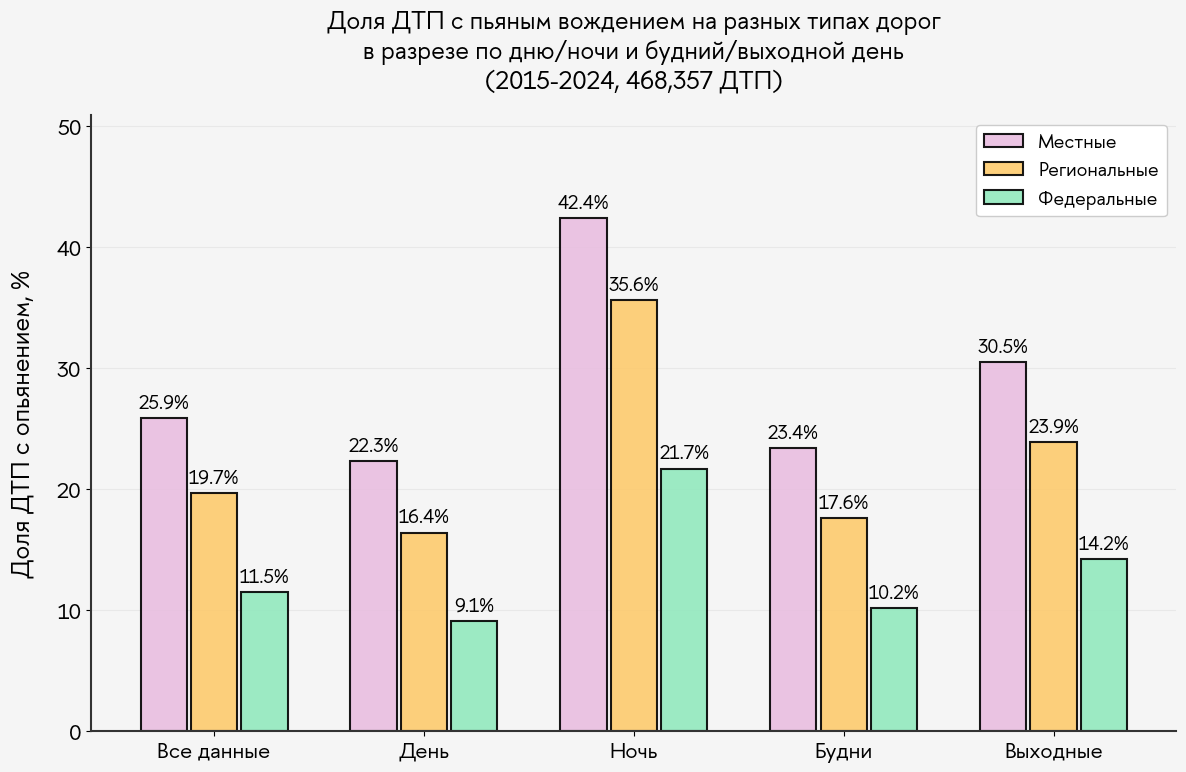

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Создаем упрощенную версию графика только с основными подгруппами
print("\n" + "="*80)
print("СОЗДАНИЕ УПРОЩЕННОЙ ВЕРСИИ ГРАФИКА С РЕАЛЬНЫМИ ДАННЫМИ")
print("="*80)

# 1. Загрузка и установка шрифта HSESans-Regular
print("\n🎨 Настройка шрифта HSESans-Regular...")

# Путь к шрифту
font_path = '/content/HSESans-Regular.otf'

# Проверяем наличие файла шрифта
if os.path.exists(font_path):
    # Регистрируем шрифт
    fm.fontManager.addfont(font_path)
    font_name = fm.FontProperties(fname=font_path).get_name()
    
    # Устанавливаем шрифт по умолчанию
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name]
    
    print(f"✅ Шрифт загружен: {font_name}")
else:
    print(f"⚠️ Файл шрифта не найден: {font_path}")
    print("Используется стандартный шрифт matplotlib")

# Проверяем наличие необходимых колонок
required_columns = ['road_rank_cat', 'impaired_driving', 'is_weekend', 'is_night']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"⚠️ Отсутствуют колонки: {missing_cols}")
    print("Убедитесь, что эти колонки есть в датасете")
else:
    print("✅ Все необходимые колонки присутствуют")

# 2. Классификация дорог на основе road_rank_cat
print("\n📊 Классификация дорог...")

def classify_road_simple(road_rank):
    if pd.isna(road_rank):
        return None
    
    road_str = str(road_rank).strip()
    
    if 'Федеральная' in road_str:
        return 'Федеральные дороги'
    elif 'Региональная' in road_str or 'межмуниципальная' in road_str.lower():
        return 'Региональные дороги'
    elif 'Местного значения' in road_str or 'местного' in road_str.lower():
        return 'Местные дороги'
    else:
        return 'Другие'

df['road_type'] = df['road_rank_cat'].apply(classify_road_simple)

# Фильтруем только основные типы дорог
road_types = ['Местные дороги', 'Региональные дороги', 'Федеральные дороги']
filtered_df = df[df['road_type'].isin(road_types)].copy()

print(f"ДТП после фильтрации по типам дорог: {len(filtered_df):,} из {len(df):,} ({len(filtered_df)/len(df)*100:.1f}%)")

# 3. Расчет процентов для каждой подгруппы
print("\n📈 Расчет процентов пьяных водителей для каждой подгруппы...")

# Будем использовать impaired_driving для пьяных водителей
# Создаем словарь для хранения результатов
results = {
    'Подгруппа': ['Все данные', 'День', 'Ночь', 'Будни', 'Выходные'],
    'Местные дороги': [],
    'Региональные дороги': [],
    'Федеральные дороги': []
}

# Функция для расчета процента пьяных водителей
def calculate_drunk_percentage(data_subset, road_type):
    """Рассчитывает процент ДТП с пьяными водителями для подмножества данных"""
    if len(data_subset) == 0:
        return 0.0
    
    # Фильтруем по типу дороги
    road_data = data_subset[data_subset['road_type'] == road_type]
    
    if len(road_data) == 0:
        return 0.0
    
    # Рассчитываем процент ДТП с impaired_driving = 1
    drunk_percentage = road_data['impaired_driving'].mean() * 100
    
    return drunk_percentage
# Рассчитываем для каждой подгруппы
for subgroup in results['Подгруппа']:
    print(f"\n  Подгруппа: {subgroup}")
    
    # Определяем фильтр для подгруппы
    if subgroup == 'Все данные':
        subset = filtered_df
    elif subgroup == 'День':
        subset = filtered_df[filtered_df['is_night'] == 0]
    elif subgroup == 'Ночь':
        subset = filtered_df[filtered_df['is_night'] == 1]
    elif subgroup == 'Будни':
        subset = filtered_df[filtered_df['is_weekend'] == 0]
    elif subgroup == 'Выходные':
        subset = filtered_df[filtered_df['is_weekend'] == 1]
    else:
        subset = pd.DataFrame()  # Пустой датафрейм
    
    # Рассчитываем проценты для каждого типа дорог
    for road_type in road_types:
        percentage = calculate_drunk_percentage(subset, road_type)
        results[road_type].append(percentage)
        
        # Выводим информацию для отладки
        count = len(subset[subset['road_type'] == road_type])
        print(f"    {road_type}: {count:,} ДТП, {percentage:.1f}% с опьянением")

# Создаем DataFrame с результатами
df_results = pd.DataFrame(results)

# Округляем значения для красивого отображения
for col in ['Местные дороги', 'Региональные дороги', 'Федеральные дороги']:
    df_results[col] = df_results[col].round(1)

print("\n📋 Итоговая таблица с процентами:")
print(df_results.to_string(index=False))

# 4. Визуализация с использованием шрифта HSESans
print("\n🎨 Создание графика с шрифтом HSESans...")

# Цвета для разных типов дорог
colors = ['#E9BEE0', '#fdcb6e', '#93E9BE']

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Настройки столбцов
width = 0.22
x = np.arange(len(df_results))
spacing = 0.02

# Столбцы с увеличенной шириной
bars_local = ax.bar(x - width - spacing, df_results['Местные дороги'], width,
                   color=colors[0], edgecolor='black', linewidth=1.5,
                   label='Местные', alpha=0.9)

bars_regional = ax.bar(x, df_results['Региональные дороги'], width,
                      color=colors[1], edgecolor='black', linewidth=1.5,
                      label='Региональные', alpha=0.9)

bars_federal = ax.bar(x + width + spacing, df_results['Федеральные дороги'], width,
                     color=colors[2], edgecolor='black', linewidth=1.5,
                     label='Федеральные', alpha=0.9)

# Значения над столбцами с использованием шрифта HSESans
for bars in [bars_local, bars_regional, bars_federal]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
               f'{height:.1f}%', ha='center', va='bottom',
               fontsize=14, fontweight='bold', color='black')

# Настройки осей с использованием шрифта HSESans
ax.set_xticks(x)
ax.set_xticklabels(df_results['Подгруппа'], fontsize=16, fontweight='bold')
ax.set_ylabel('Доля ДТП с опьянением, %', fontsize=18, fontweight='bold', labelpad=15)

# Определяем верхний предел для оси Y
max_value = df_results[['Местные дороги', 'Региональные дороги', 'Федеральные дороги']].max().max()
ax.set_ylim(0, max(35, max_value * 1.2))

# Увеличиваем размер подписей по оси Y
ax.tick_params(axis='y', labelsize=16)

# Убираем границы
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')

# Сетка
ax.grid(True, alpha=0.3, axis='y', color='#CCCCCC')
ax.set_axisbelow(True)

# Легенда с использованием шрифта HSESans
ax.legend(loc='upper right', fontsize=14, framealpha=1.0)

# Заголовок с использованием шрифта HSESans
total_dtps = len(filtered_df)
years_range = f"{filtered_df['year'].min()}-{filtered_df['year'].max()}" if 'year' in filtered_df.columns else ""
title_text = f'Доля ДТП с пьяным вождением на разных типах дорог\nв разрезе по дню/ночи и будний/выходной день'
if years_range:
    title_text += f'\n({years_range}, {total_dtps:,} ДТП)'

ax.set_title(title_text, fontsize=18, fontweight='bold', pad=20)


ГРАФИК СРАВНЕНИЯ БУДНИХ И ВЫХОДНЫХ ДНЕЙ

🎨 Настройка шрифта HSESans-Regular...
⚠️ Файл шрифта не найден: /content/HSESans-Regular.otf
Используется стандартный шрифт matplotlib
✅ Все необходимые колонки присутствуют

📊 Классификация дорог...
ДТП после фильтрации по типам дорог: 468,357 из 473,188 (99.0%)

📈 Расчет процентов пьяных водителей для будних и выходных дней...

  День недели: Будни
    Местные: 22,425 ДТП, 23.4% с опьянением
    Региональные: 172,073 ДТП, 17.6% с опьянением
    Федеральные: 118,621 ДТП, 10.2% с опьянением

  День недели: Выходные
    Местные: 12,251 ДТП, 30.5% с опьянением
    Региональные: 86,816 ДТП, 23.9% с опьянением
    Федеральные: 56,171 ДТП, 14.2% с опьянением

📋 Итоговая таблица с процентами:
День недели  Местные  Региональные  Федеральные
      Будни     23.4          17.6         10.2
   Выходные     30.5          23.9         14.2

🎨 Создание чистого графика с увеличенными подписями...


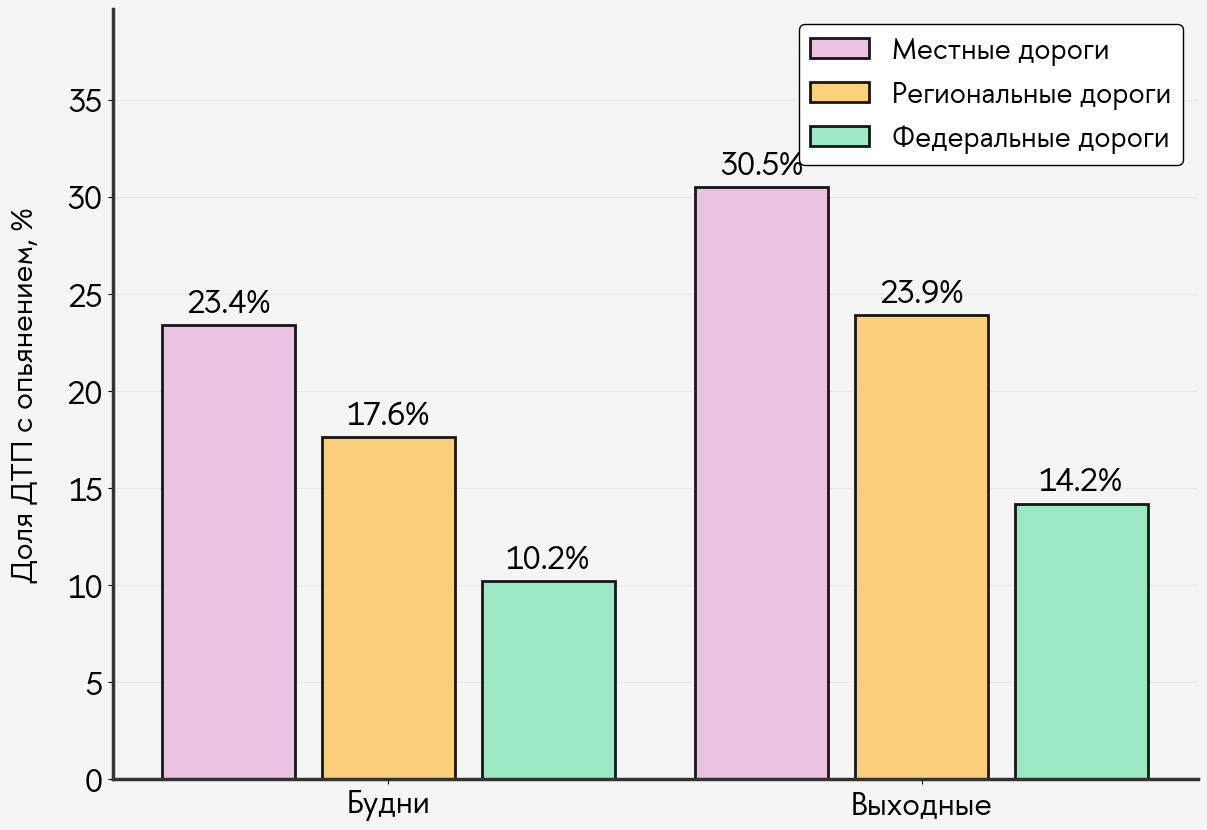

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

print("\n" + "="*80)
print("ГРАФИК СРАВНЕНИЯ БУДНИХ И ВЫХОДНЫХ ДНЕЙ")
print("="*80)

# 1. Загрузка и установка шрифта HSESans-Regular
print("\n🎨 Настройка шрифта HSESans-Regular...")

# Путь к шрифту
font_path = '/content/HSESans-Regular.otf'

# Проверяем наличие файла шрифта
if os.path.exists(font_path):
    # Регистрируем шрифт
    fm.fontManager.addfont(font_path)
    font_name = fm.FontProperties(fname=font_path).get_name()
    
    # Устанавливаем шрифт по умолчанию
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.sans-serif'] = [font_name]
    plt.rcParams['axes.titlesize'] = 23  # Увеличиваем размер заголовка
    plt.rcParams['axes.labelsize'] = 23  # Увеличиваем размер подписей осей
    plt.rcParams['xtick.labelsize'] = 22  # Увеличиваем размер подписей по оси X
    plt.rcParams['ytick.labelsize'] = 23  # Увеличиваем размер подписей по оси Y
    plt.rcParams['legend.fontsize'] = 20  # Увеличиваем размер легенды
    
    print(f"✅ Шрифт загружен: {font_name}")
else:
    print(f"⚠️ Файл шрифта не найден: {font_path}")
    print("Используется стандартный шрифт matplotlib")

# Проверяем наличие необходимых колонок
required_columns = ['road_rank_cat', 'impaired_driving', 'is_weekend', 'is_night']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"⚠️ Отсутствуют колонки: {missing_cols}")
    print("Убедитесь, что эти колонки есть в датасете")
else:
    print("✅ Все необходимые колонки присутствуют")

# 2. Классификация дорог на основе road_rank_cat
print("\n📊 Классификация дорог...")

def classify_road_simple(road_rank):
    if pd.isna(road_rank):
        return None
    
    road_str = str(road_rank).strip()
    
    if 'Федеральная' in road_str:
        return 'Федеральные'
    elif 'Региональная' in road_str or 'межмуниципальная' in road_str.lower():
        return 'Региональные'
    elif 'Местного значения' in road_str or 'местного' in road_str.lower():
        return 'Местные'
    else:
        return 'Другие'

df['road_type'] = df['road_rank_cat'].apply(classify_road_simple)

# Фильтруем только основные типы дорог
road_types = ['Местные', 'Региональные', 'Федеральные']
filtered_df = df[df['road_type'].isin(road_types)].copy()

print(f"ДТП после фильтрации по типам дорог: {len(filtered_df):,} из {len(df):,} ({len(filtered_df)/len(df)*100:.1f}%)")

# 3. Расчет процентов для будних и выходных дней
print("\n📈 Расчет процентов пьяных водителей для будних и выходных дней...")

# Будем использовать impaired_driving для пьяных водителей
# Создаем словарь для хранения результатов
results_week = {
    'День недели': ['Будни', 'Выходные'],
    'Местные': [],
    'Региональные': [],
    'Федеральные': []
}

# Функция для расчета процента пьяных водителей
def calculate_drunk_percentage(data_subset, road_type):
    """Рассчитывает процент ДТП с пьяными водителями для подмножества данных"""
    if len(data_subset) == 0:
        return 0.0
    
    # Фильтруем по типу дороги
    road_data = data_subset[data_subset['road_type'] == road_type]
    
    if len(road_data) == 0:
        return 0.0
    
    # Рассчитываем процент ДТП с impaired_driving = 1
    drunk_percentage = road_data['impaired_driving'].mean() * 100
    
    return drunk_percentage
# Рассчитываем для будних и выходных дней
for day_type in results_week['День недели']:
    print(f"\n  День недели: {day_type}")
    
    # Определяем фильтр
    if day_type == 'Будни':
        subset = filtered_df[filtered_df['is_weekend'] == 0]
    else:  # Выходные
        subset = filtered_df[filtered_df['is_weekend'] == 1]
    
    # Рассчитываем проценты для каждого типа дорог
    for road_type in road_types:
        percentage = calculate_drunk_percentage(subset, road_type)
        results_week[road_type].append(percentage)
        
        # Выводим информацию для отладки
        count = len(subset[subset['road_type'] == road_type])
        print(f"    {road_type}: {count:,} ДТП, {percentage:.1f}% с опьянением")

# Создаем DataFrame с результатами
df_week_results = pd.DataFrame(results_week)

# Округляем значения для красивого отображения
for col in road_types:
    df_week_results[col] = df_week_results[col].round(1)

print("\n📋 Итоговая таблица с процентами:")
print(df_week_results.to_string(index=False))

# 4. Создание чистого графика с увеличенными подписями
print("\n🎨 Создание чистого графика с увеличенными подписями...")

fig, ax = plt.subplots(figsize=(14, 10))  # Увеличиваем высоту для лучшего отображения
fig.patch.set_facecolor('#F5F5F5')
ax.set_facecolor('#F5F5F5')

# Цвета для разных типов дорог
colors = ['#E9BEE0', '#fdcb6e', '#93E9BE']

# Настройки столбцов
width = 0.25
x = np.arange(len(df_week_results))
spacing = 0.05

# Столбцы для каждого типа дорог
bars_local = ax.bar(x - width - spacing, df_week_results['Местные'], width,
                   color=colors[0], edgecolor='black', linewidth=2,
                   label='Местные дороги', alpha=0.9)

bars_regional = ax.bar(x, df_week_results['Региональные'], width,
                      color=colors[1], edgecolor='black', linewidth=2,
                      label='Региональные дороги', alpha=0.9)

bars_federal = ax.bar(x + width + spacing, df_week_results['Федеральные'], width,
                     color=colors[2], edgecolor='black', linewidth=2,
                     label='Федеральные дороги', alpha=0.9)

# УВЕЛИЧЕННЫЕ значения над столбцами БЕЗ границ
for bars, road_type in zip([bars_local, bars_regional, bars_federal], road_types):
    for bar, value in zip(bars, df_week_results[road_type]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
               f'{value:.1f}%', 
               ha='center', 
               va='bottom',
               fontsize=23,  # Увеличили с 14 до 18
               fontweight='bold', 
               color='black')
               # Убрали bbox для удаления границ

# Настройки осей с УВЕЛИЧЕННЫМИ подписями
ax.set_xticks(x)
ax.set_xticklabels(df_week_results['День недели'], 
                   fontsize=23,  # Увеличили с 16 до 20
                   fontweight='bold')

ax.set_ylabel('Доля ДТП с опьянением, %', 
              fontsize=22,  # Увеличили с 18 до 22
              fontweight='bold', 
              labelpad=20)

# Определяем верхний предел для оси Y
max_value = df_week_results[road_types].max().max()
ax.set_ylim(0, max(35, max_value * 1.3))

# УВЕЛИЧЕННЫЙ размер подписей по оси Y
ax.tick_params(axis='y', labelsize=23)  # Увеличили с 14 до 18

# Убираем ненужные границы
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(2.5)  # Увеличили толщину границ
    ax.spines[spine].set_color('#333333')

# Сетка
ax.grid(True, alpha=0.3, axis='y', color='#CCCCCC')
ax.set_axisbelow(True)

# УВЕЛИЧЕННАЯ легенда
ax.legend(loc='upper right', 
          fontsize=21,  # Увеличили с 14 до 18
          framealpha=1.0, 
          edgecolor='black')

# УВЕЛИЧЕННЫЙ заголовок
total_dtps = len(filtered_df)
years_range = f"{filtered_df['year'].min()}-{filtered_df['year'].max()}" if 'year' in filtered_df.columns else ""
title_text = f'Сравнение доли ДТП с пьяным вождением\nв будние и выходные дни по типам дорог'
if years_range:
    title_text += f'\n({years_range}, {len(filtered_df):,} ДТП)'